In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [3]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform, loguniform

In [4]:
from lifelines import KaplanMeierFitter

In [5]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.tree import SurvivalTree
from sksurv.meta import Stacking
from sksurv.linear_model import CoxPHSurvivalAnalysis

## Import dataset

In [6]:
# Import dataset
df = pd.read_csv('dataset_da_2017.csv', encoding='utf-8')
print(df.head())

   Patient ID  Year of diagnosis     Sex  Age   Race Median household income  \
0        3614               2017  Female   74  White               ≥ $75,000   
1        4135               2017  Female   78  White               ≥ $75,000   
2        4432               2017  Female   69  White               ≥ $75,000   
3        7922               2017  Female   79  White               ≥ $75,000   
4       66852               2017  Female   81  White               ≥ $75,000   

      Marital status at diagnosis    Grade Combined Summary Stage Stage Group  \
0  Married (including common law)      III                Distant          IV   
1                         Widowed  Unknown                Distant          IV   
2                        Divorced  Unknown                Distant          IV   
3                        Divorced       II               Regional          II   
4  Married (including common law)      III               Regional         III   

   ... Surgery Radiation Chemoth

In [7]:
# Drop some unuseful columns
columns_to_drop = ['Patient ID', 'Year of diagnosis', 'Survival months flag']
df = df.drop(columns=columns_to_drop)
print(df.head())
print(df.shape)

      Sex  Age   Race Median household income     Marital status at diagnosis  \
0  Female   74  White               ≥ $75,000  Married (including common law)   
1  Female   78  White               ≥ $75,000                         Widowed   
2  Female   69  White               ≥ $75,000                        Divorced   
3  Female   79  White               ≥ $75,000                        Divorced   
4  Female   81  White               ≥ $75,000  Married (including common law)   

     Grade Combined Summary Stage Stage Group Tumor Size Surgery Radiation  \
0      III                Distant          IV         50      No   Unknown   
1  Unknown                Distant          IV         56      No   Unknown   
2  Unknown                Distant          IV         66      No   Unknown   
3       II               Regional          II         23     Yes   Unknown   
4      III               Regional         III         68      No       Yes   

  Chemotherapy Mets at DX-bone Mets at DX-br

In [8]:
# Replace the unknown values with NaNs
df.replace("Unknown", np.nan, inplace=True)
print(df.head())

      Sex  Age   Race Median household income     Marital status at diagnosis  \
0  Female   74  White               ≥ $75,000  Married (including common law)   
1  Female   78  White               ≥ $75,000                         Widowed   
2  Female   69  White               ≥ $75,000                        Divorced   
3  Female   79  White               ≥ $75,000                        Divorced   
4  Female   81  White               ≥ $75,000  Married (including common law)   

  Grade Combined Summary Stage Stage Group Tumor Size Surgery Radiation  \
0   III                Distant          IV         50      No       NaN   
1   NaN                Distant          IV         56      No       NaN   
2   NaN                Distant          IV         66      No       NaN   
3    II               Regional          II         23     Yes       NaN   
4   III               Regional         III         68      No       Yes   

  Chemotherapy Mets at DX-bone Mets at DX-brain Mets at DX-liv

## EDA (before imputation)

### Missing values

In [75]:
# Calculate the percentage of missing values ​​for each column
missing_percentage = df.isnull().sum() / len(df)
# Sort the percentage of missing values
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)

Radiation                      0.571482
Grade                          0.508077
Tumor Size                     0.131180
Marital status at diagnosis    0.044407
Mets at DX-lung                0.016527
Mets at DX-liver               0.015061
Mets at DX-brain               0.014687
Mets at DX-bone                0.013135
Combined Summary Stage         0.005087
Race                           0.003708
Sex                            0.000000
Survival months                0.000000
Surgery                        0.000000
Chemotherapy                   0.000000
Age                            0.000000
Stage Group                    0.000000
Median household income        0.000000
Vital status                   0.000000
dtype: float64


                        Column  Missing Percentage
0                    Radiation           57.148195
1                        Grade           50.807657
2                   Tumor Size           13.117958
3  Marital status at diagnosis            4.440676
4              Mets at DX-lung            1.652679
5             Mets at DX-liver            1.506093
6             Mets at DX-brain            1.468728
7              Mets at DX-bone            1.313520
8       Combined Summary Stage            0.508738
9                         Race            0.370775


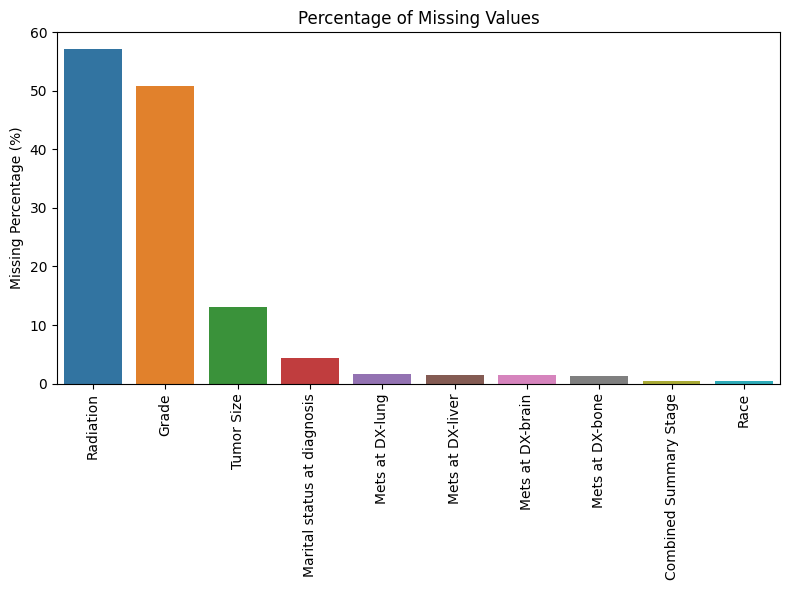

In [76]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_table = pd.DataFrame({'Column': missing_percentage_sorted.index, 'Missing Percentage': missing_percentage_sorted.values})
print(missing_percentage_table)


plt.figure(figsize=(8, 6))
sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.xticks(rotation=90)  
plt.ylabel('Missing Percentage (%)')
plt.title('Percentage of Missing Values')
plt.tight_layout()
plt.show()

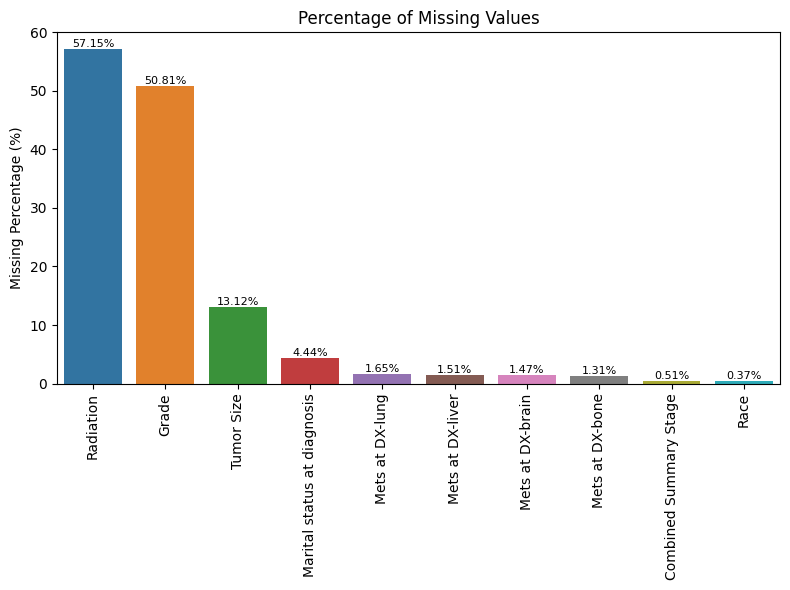

In [77]:
# Calculate missing percentages
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_table = pd.DataFrame({'Column': missing_percentage_sorted.index, 'Missing Percentage': missing_percentage_sorted.values})

# Plotting the missing percentage
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.xticks(rotation=90)
plt.ylabel('Missing Percentage (%)')
plt.title('Percentage of Missing Values')

# Adding percentage labels to the bars
for index, value in enumerate(missing_percentage_sorted):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [78]:
# Check the type of variables
print(df.dtypes)

Sex                            object
Age                             int64
Race                           object
Median household income        object
Marital status at diagnosis    object
Grade                          object
Combined Summary Stage         object
Stage Group                    object
Tumor Size                     object
Surgery                        object
Radiation                      object
Chemotherapy                   object
Mets at DX-bone                object
Mets at DX-brain               object
Mets at DX-liver               object
Mets at DX-lung                object
Survival months                 int64
Vital status                   object
dtype: object


### Distribution of continuous variables

In [79]:
df['Tumor Size'] = pd.to_numeric(df['Tumor Size'], errors='coerce')

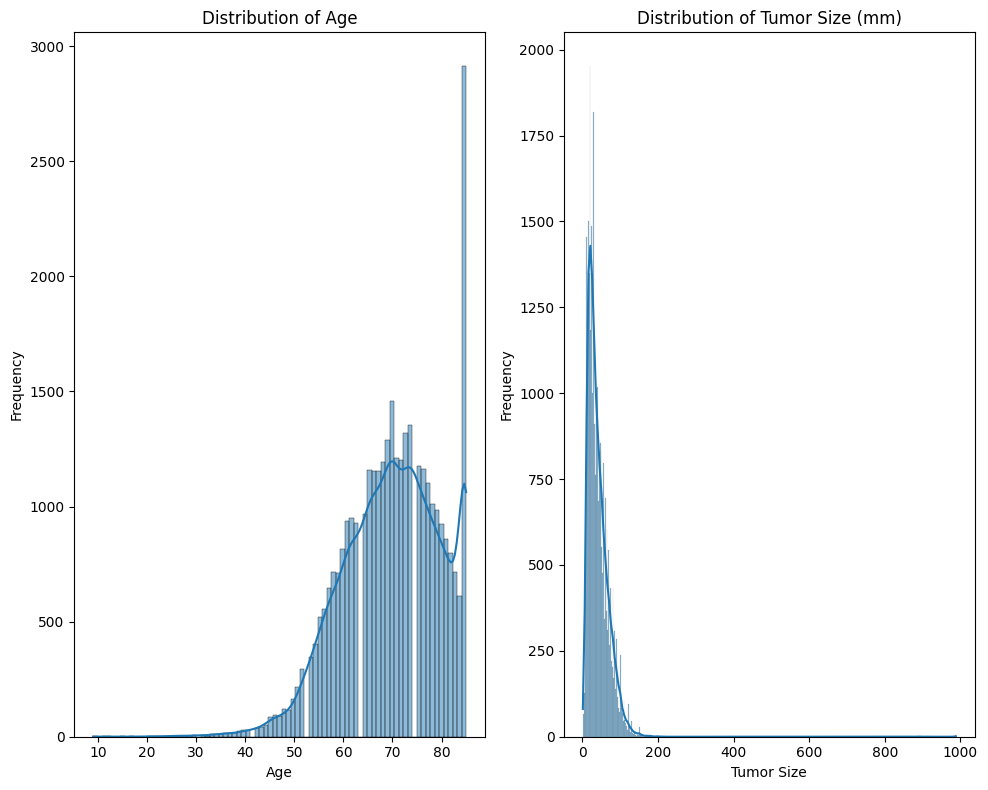

In [80]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Plot the distribution of Age
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid
sns.histplot(df['Age'].dropna(), kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Plot the distribution of Tumor Size
plt.subplot(1, 2, 2)  # Create the second subplot in a 1x2 grid
sns.histplot(df['Tumor Size'].dropna(), kde=True)
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.title('Distribution of Tumor Size (mm)')

# Display the plots
plt.tight_layout()
plt.show()

In [81]:
# Generate summary statistics for Age and Tumor Size
summary = df[['Age', 'Tumor Size']].describe()

print(summary)

                Age    Tumor Size
count  34792.000000  30228.000000
mean      69.942717     40.860791
std       10.010616     30.274523
min        9.000000      1.000000
25%       63.000000     20.000000
50%       70.000000     34.000000
75%       78.000000     55.000000
max       85.000000    988.000000


### Response variable

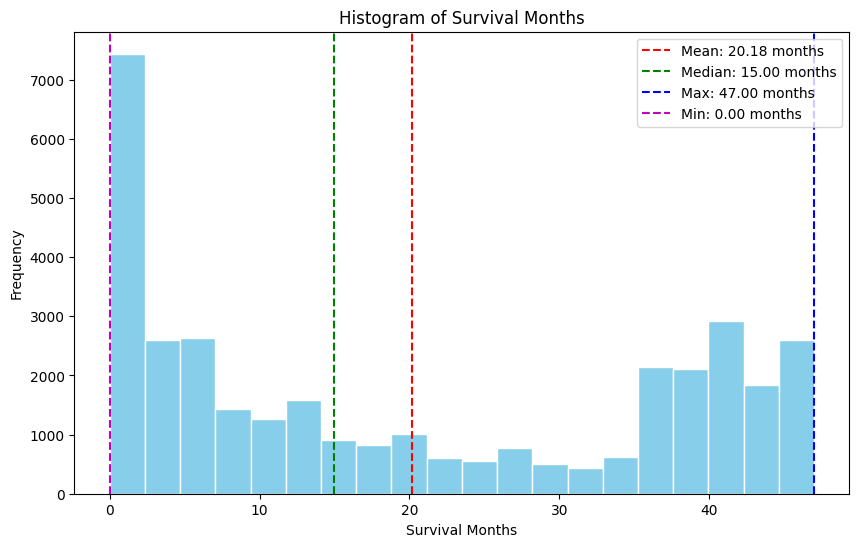

In [82]:
import matplotlib.pyplot as plt

# Compute mean, median, max, and min survival time
mean_survival = df['Survival months'].mean()
median_survival = df['Survival months'].median()
max_survival = df['Survival months'].max()
min_survival = df['Survival months'].min()

# Plotting a histogram of 'Survival months' with mean, median, max, and min annotations
plt.figure(figsize=(10, 6))
plt.hist(df['Survival months'], bins=20, color='skyblue', edgecolor='white')  
plt.axvline(x=mean_survival, color='r', linestyle='--', label=f'Mean: {mean_survival:.2f} months')
plt.axvline(x=median_survival, color='g', linestyle='--', label=f'Median: {median_survival:.2f} months')
plt.axvline(x=max_survival, color='b', linestyle='--', label=f'Max: {max_survival:.2f} months')
plt.axvline(x=min_survival, color='m', linestyle='--', label=f'Min: {min_survival:.2f} months')
plt.title('Histogram of Survival Months')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.legend()
plt.show()


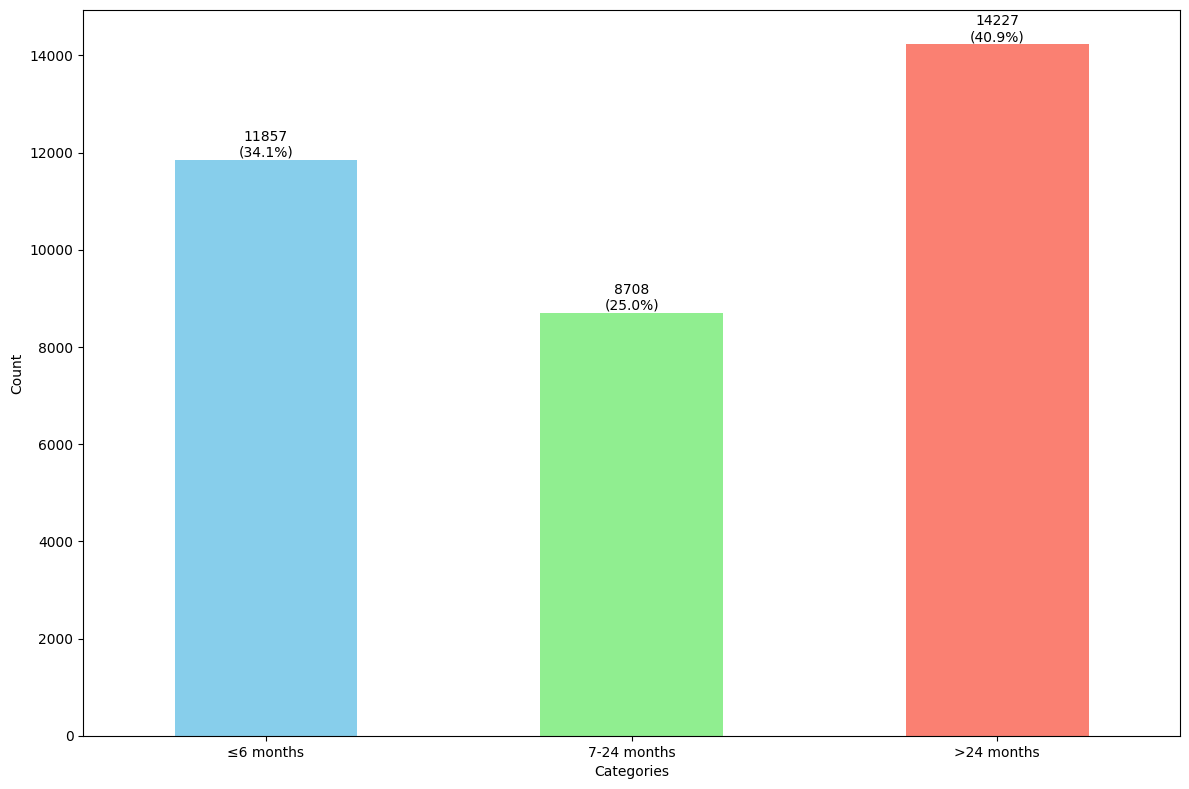

In [89]:
# Split the response y_surv into 3 categories: '>24 months', '≤6 months', '7-24 months' for classification models
bins = [0, 6, 24, float('inf')]
labels = ['≤6 months', '7-24 months', '>24 months']
y_category = pd.cut(y_surv, bins=bins, labels=labels, include_lowest=True)

# Calculate the counts and percentage of each category
category_counts = y_category.value_counts().reindex(labels)
category_proportions = y_category.value_counts(normalize=True).reindex(labels) * 100  # Convert to percentage

# Create a subplot layout with 1 row and 1 column
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting a bar chart for the category counts with annotations
category_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], ax=ax)
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_xticklabels(labels, rotation=0)

# Annotate the bars with counts and percentages
for index, patch in enumerate(ax.patches):
    height = patch.get_height()
    percentage = category_proportions[labels[index]]
    ax.annotate(f'{height}\n({percentage:.1f}%)', 
                (patch.get_x() + patch.get_width() / 2, height), 
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Vital Status Counts:
Dead     23513
Alive    11279
Name: Vital status, dtype: int64

Vital Status Proportions:
Dead     0.675816
Alive    0.324184
Name: Vital status, dtype: float64


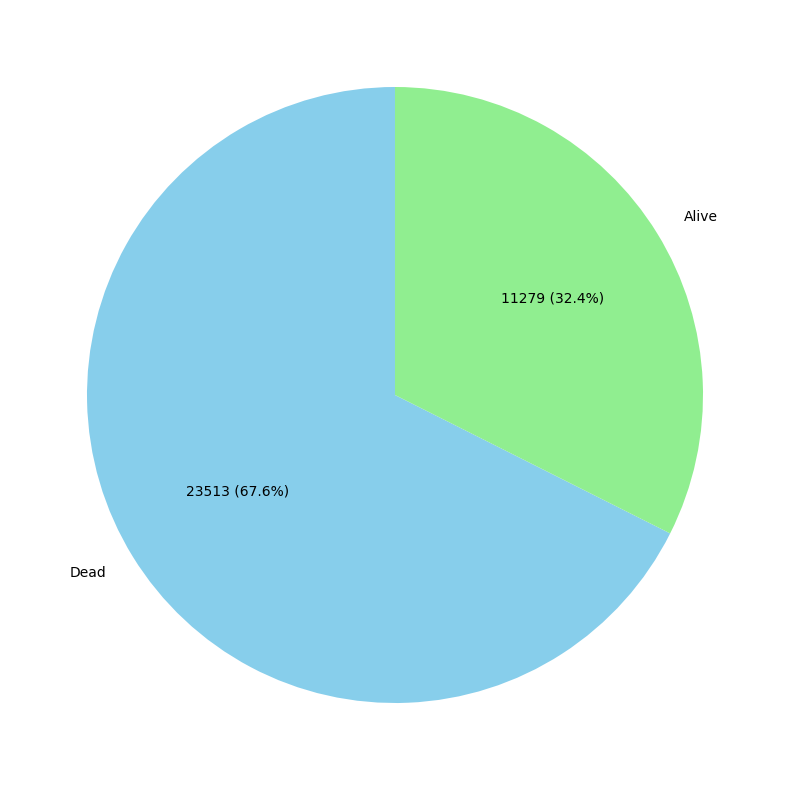

In [90]:
# Calculate the counts and percentages for each category
vital_counts = y_vital.value_counts()
vital_proportions = y_vital.value_counts(normalize=True)

print("Vital Status Counts:")
print(vital_counts)
print("\nVital Status Proportions:")
print(vital_proportions)

# Define a function to format the labels with both absolute numbers and percentages
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute} ({pct:.1f}%)'

# Create a subplot layout with 1 row and 1 column
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting a pie chart for the category proportions with custom annotations
vital_proportions.plot(kind='pie', 
                       autopct=lambda pct: func(pct, vital_counts),
                       colors=['skyblue', 'lightgreen'],
                       ax=ax,
                       startangle=90)
ax.set_ylabel('')  # Hide the y-label for the pie chart

# Show the plot
plt.tight_layout()
plt.show()


### Distributiom of categorical variables

In [91]:
categorical_columns = ['Sex', 'Race', 'Marital status at diagnosis', 'Surgery', 'Radiation',
                       'Chemotherapy', 'Mets at DX-bone', 'Mets at DX-brain', 'Mets at DX-lung',
                       'Mets at DX-liver', 'Median household income', 'Grade', 'Stage Group',
                       'Combined Summary Stage']
df_categorical =  df[categorical_columns]
# Generate summary statistics for Age and Tumor Size
summary = df_categorical.describe()
print(summary)

          Sex   Race     Marital status at diagnosis Surgery Radiation  \
count   34792  34663                           33247   34792     14909   
unique      2      4                               6       2         2   
top      Male  White  Married (including common law)      No       Yes   
freq    18181  27697                           17217   26746     14411   

       Chemotherapy Mets at DX-bone Mets at DX-brain Mets at DX-lung  \
count         34792           34335            34281           34217   
unique            2               2                2               2   
top              No              No               No              No   
freq          21601           27844            29936           29037   

       Mets at DX-liver Median household income  Grade Stage Group  \
count             34268                   34792  17115       34792   
unique                2                      10      4           4   
top                  No               ≥ $75,000    III    

In [92]:
from tabulate import tabulate
def calculate_percentages(series):
    return series.value_counts(normalize=True) * 100

df_percentages = pd.DataFrame(index=df_categorical.columns, columns=['Categories', 'Percentage (%)'])

for col in df_categorical.columns:
    percentages = calculate_percentages(df_categorical[col])
    df_percentages.loc[col, 'Categories'] = '\n'.join(percentages.index.tolist())
    df_percentages.loc[col, 'Percentage (%)'] = '\n'.join(percentages.apply(lambda x: f'{x:.2f}').tolist())

table = tabulate(df_percentages, headers='keys', tablefmt='fancy_grid')

print(table)

╒═════════════════════════════╤════════════════════════════════╤══════════════════╕
│                             │ Categories                     │ Percentage (%)   │
╞═════════════════════════════╪════════════════════════════════╪══════════════════╡
│ Sex                         │ Male                           │ 52.26            │
│                             │ Female                         │ 47.74            │
├─────────────────────────────┼────────────────────────────────┼──────────────────┤
│ Race                        │ White                          │ 79.90            │
│                             │ Black                          │ 11.29            │
│                             │ Asian or Pacific Islander      │ 8.18             │
│                             │ American Indian/Alaska Native  │ 0.63             │
├─────────────────────────────┼────────────────────────────────┼──────────────────┤
│ Marital status at diagnosis │ Married (including common law) │ 51.79      

## Split the dataset into train and test set

In [9]:
# Define X and y
X = df.drop(['Survival months', 'Vital status'], axis=1)
y_surv = df['Survival months']
y_vital = df['Vital status']
# Split data for 70% train and 30% test
x_train, x_test, y_surv_train, y_surv_test, y_vital_train, y_vital_test = train_test_split(
    X, y_surv, y_vital, test_size=0.3, random_state=42, stratify=y_vital)

## Label encoding: Median household income, Grade, Stage Group, Combined Summary Stage

In [10]:
# Create mapping dictionaries
income_mapping = {'< $35,000': 0, '$35,000 - $39,999': 1, '$40,000 - $44,999': 2, '$45,000 - $49,999': 3, '$50,000 - $54,999': 4,
                  '$55,000 - $59,999': 5, '$60,000 - $64,999': 6, '$65,000 - $69,999': 7, '$70,000 - $74,999': 8, '≥ $75,000': 9}
grade_mapping = {'I': 0, 'II': 1, 'III': 2, 'IV': 3}
stage_mapping = {'I': 0, 'II': 1, 'III': 2, 'IV': 3}
summary_stage_mapping = {'Localized': 0, 'Regional': 1, 'Distant': 2}

# Encode the ordinal variables
x_train['Median household income'] = x_train['Median household income'].map(income_mapping)
x_test['Median household income'] = x_test['Median household income'].map(income_mapping)

x_train['Grade'] = x_train['Grade'].map(grade_mapping)
x_test['Grade'] = x_test['Grade'].map(grade_mapping)

x_train['Stage Group'] = x_train['Stage Group'].map(stage_mapping)
x_test['Stage Group'] = x_test['Stage Group'].map(stage_mapping)

x_train['Combined Summary Stage'] = x_train['Combined Summary Stage'].map(summary_stage_mapping)
x_test['Combined Summary Stage'] = x_test['Combined Summary Stage'].map(summary_stage_mapping)

In [11]:
print(x_train.dtypes)
print(x_train.head())

Sex                             object
Age                              int64
Race                            object
Median household income          int64
Marital status at diagnosis     object
Grade                          float64
Combined Summary Stage         float64
Stage Group                      int64
Tumor Size                      object
Surgery                         object
Radiation                       object
Chemotherapy                    object
Mets at DX-bone                 object
Mets at DX-brain                object
Mets at DX-liver                object
Mets at DX-lung                 object
dtype: object
          Sex  Age   Race  Median household income  \
6636     Male   85  White                        8   
24979  Female   58  White                        3   
12378  Female   75  White                        8   
15263  Female   70  White                        9   
21547    Male   74  White                        5   

          Marital status at diagnosis

## One-hot encoding

In [12]:
# Nominal variables
nominal_vars = ["Sex", "Race", "Marital status at diagnosis", "Surgery", "Radiation",
                "Chemotherapy", "Mets at DX-bone", "Mets at DX-brain", "Mets at DX-lung",
                "Mets at DX-liver"]

# Perform One-Hot encoding on nominal variables
x_train = pd.get_dummies(x_train, columns=nominal_vars)
x_test = pd.get_dummies(x_test, columns=nominal_vars)

In [13]:
print(x_train.dtypes)
print(x_train.head())

Age                                                             int64
Median household income                                         int64
Grade                                                         float64
Combined Summary Stage                                        float64
Stage Group                                                     int64
Tumor Size                                                     object
Sex_Female                                                      uint8
Sex_Male                                                        uint8
Race_American Indian/Alaska Native                              uint8
Race_Asian or Pacific Islander                                  uint8
Race_Black                                                      uint8
Race_White                                                      uint8
Marital status at diagnosis_Divorced                            uint8
Marital status at diagnosis_Married (including common law)      uint8
Marital status at di

## Convert "Tumor Size" into a numeric variable

In [14]:
x_train["Tumor Size"] = pd.to_numeric(x_train["Tumor Size"], errors="coerce")
x_test["Tumor Size"] = pd.to_numeric(x_test["Tumor Size"], errors="coerce")
print(x_train.dtypes)
print(x_train.head())

Age                                                             int64
Median household income                                         int64
Grade                                                         float64
Combined Summary Stage                                        float64
Stage Group                                                     int64
Tumor Size                                                    float64
Sex_Female                                                      uint8
Sex_Male                                                        uint8
Race_American Indian/Alaska Native                              uint8
Race_Asian or Pacific Islander                                  uint8
Race_Black                                                      uint8
Race_White                                                      uint8
Marital status at diagnosis_Divorced                            uint8
Marital status at diagnosis_Married (including common law)      uint8
Marital status at di

## Imputation with KNN

In [15]:
# Save the column names and indexes before imputation
columns = x_train.columns.tolist()
train_index = x_train.index
test_index = x_test.index

In [16]:
%%time
# Initialize the KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)  
# Fit the imputer on the training data and transform it
x_train_imputed = imputer.fit_transform(x_train)
# Transform the test data
x_test_imputed = imputer.transform(x_test)

CPU times: total: 40.1 s
Wall time: 49.9 s


In [17]:
# Check if there are still missing values in the dataset
print(np.isnan(x_train_imputed).sum())
print(np.isnan(x_test_imputed).sum())

0
0


In [18]:
# Convert back to pandas dataframe
x_train_df = pd.DataFrame(x_train_imputed, columns=columns, index=train_index)
x_test_df = pd.DataFrame(x_test_imputed, columns=columns, index=test_index)
print(x_train_df.columns)
print(x_train_df.index)

Index(['Age', 'Median household income', 'Grade', 'Combined Summary Stage',
       'Stage Group', 'Tumor Size', 'Sex_Female', 'Sex_Male',
       'Race_American Indian/Alaska Native', 'Race_Asian or Pacific Islander',
       'Race_Black', 'Race_White', 'Marital status at diagnosis_Divorced',
       'Marital status at diagnosis_Married (including common law)',
       'Marital status at diagnosis_Separated',
       'Marital status at diagnosis_Single (never married)',
       'Marital status at diagnosis_Unmarried or Domestic Partner',
       'Marital status at diagnosis_Widowed', 'Surgery_No', 'Surgery_Yes',
       'Radiation_No', 'Radiation_Yes', 'Chemotherapy_No', 'Chemotherapy_Yes',
       'Mets at DX-bone_No', 'Mets at DX-bone_Yes', 'Mets at DX-brain_No',
       'Mets at DX-brain_Yes', 'Mets at DX-lung_No', 'Mets at DX-lung_Yes',
       'Mets at DX-liver_No', 'Mets at DX-liver_Yes'],
      dtype='object')
Int64Index([ 6636, 24979, 12378, 15263, 21547, 17873, 28370,  2227, 12896,
     

In [19]:
# Convert into integer
cols_to_convert = ['Age', 'Median household income', 'Grade', 'Stage Group', 'Combined Summary Stage']
for col in cols_to_convert:
    x_train_df[col] = x_train_df[col].astype(int)
    x_test_df[col] = x_test_df[col].astype(int)

In [20]:
x_train_df.head()

Age  Median household income  Grade  Combined Summary Stage  \
6636    85                        8      1                       0   
24979   58                        3      2                       2   
12378   75                        8      1                       0   
15263   70                        9      1                       0   
21547   74                        5      1                       2   

       Stage Group  Tumor Size  Sex_Female  Sex_Male  \
6636             0        40.0         0.0       1.0   
24979            3        35.0         1.0       0.0   
12378            0        35.0         1.0       0.0   
15263            0         9.0         1.0       0.0   
21547            3        77.0         0.0       1.0   

       Race_American Indian/Alaska Native  Race_Asian or Pacific Islander  \
6636                                  0.0                             0.0   
24979                                 0.0                             0.0   
12378                                 0.0                             0.0   
15263                                 0.0                             0.0   
21547                                 0.0                             0.0   

       ...  Chemotherapy_No  Chemotherapy_Yes  Mets at DX-bone_No  \
6636   ...              1.0               0.0                 1.0   
24979  ...              0.0               1.0                 0.0   
12378  ...              1.0               0.0                 1.0   
15263  ...              1.0               0.0                 1.0   
21547  ...              1.0               0.0                 1.0   

       Mets at DX-bone_Yes  Mets at DX-brain_No  Mets at DX-brain_Yes  \
6636                   0.0                  1.0                   0.0   
24979                  1.0                  1.0                   0.0   
12378                  0.0                  1.0                   0.0   
15263                  0.0                  1.0                   0.0   
21547                  0.0                  0.0                   1.0   

       Mets at DX-lung_No  Mets at DX-lung_Yes  Mets at DX-liver_No  \
6636                  1.0                  0.0                  1.0   
24979                 1.0                  0.0                  0.0   
12378                 1.0                  0.0                  1.0   
15263                 1.0                  0.0                  1.0   
21547                 1.0                  0.0                  1.0   

       Mets at DX-liver_Yes  
6636                    0.0  
24979                   1.0  
12378                   0.0  
15263                   0.0  
21547                   0.0  

[5 rows x 32 columns]

## EDA (after imputation)

### Distribution of continuous variables

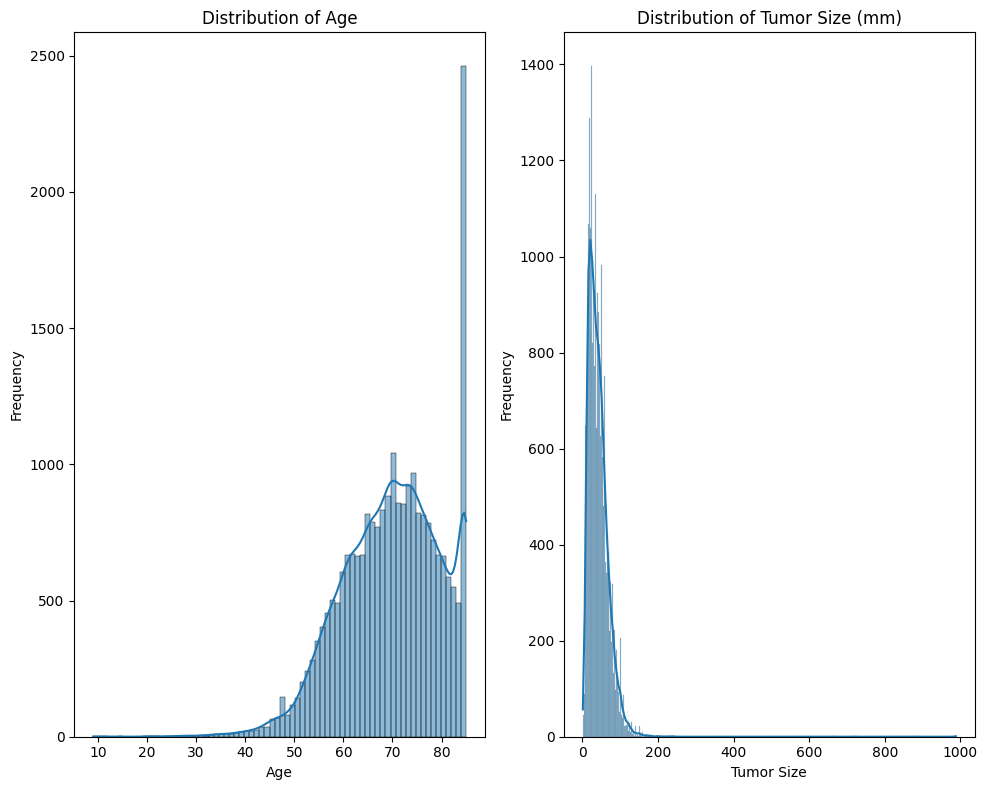

In [105]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Plot the distribution of Age
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid
sns.histplot(x_train_df['Age'].dropna(), kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Plot the distribution of Tumor Size
plt.subplot(1, 2, 2)  # Create the second subplot in a 1x2 grid
sns.histplot(x_train_df['Tumor Size'].dropna(), kde=True)
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.title('Distribution of Tumor Size (mm)')

# Display the plots
plt.tight_layout()
plt.show()

In [106]:
# Generate summary statistics for Age and Tumor Size
summary = x_train_df[['Age', 'Tumor Size']].describe()

print(summary)

                Age    Tumor Size
count  24354.000000  24354.000000
mean      69.930484     41.973778
std       10.008618     28.795239
min        9.000000      1.000000
25%       63.000000     22.000000
50%       70.000000     37.000000
75%       78.000000     55.000000
max       85.000000    988.000000


### Distributiom of categorical variables


In [107]:
x_train_df['Sex'] = x_train_df['Sex_Female'].apply(lambda x: 'Female' if x == 1 else 'Male')

def determine_race(row):
    if row['Race_White'] == 1:
        return 'White'
    elif row['Race_Black'] == 1:
        return 'Black'
    elif row['Race_Asian or Pacific Islander'] == 1:
        return 'Asian or Pacific Islander'
    else:
        return 'American Indian/Alaska Native'
x_train_df['Race'] = x_train_df.apply(determine_race, axis=1)

def determine_marital(row):
    if row['Marital status at diagnosis_Divorced'] == 1:
        return 'Divorced'
    elif row['Marital status at diagnosis_Married (including common law)'] == 1:
        return 'Married (including common law)'
    elif row['Marital status at diagnosis_Separated'] == 1:
        return 'Separated'
    elif row['Marital status at diagnosis_Single (never married)'] == 1:
        return 'Single (never married)'   
    elif row['Marital status at diagnosis_Unmarried or Domestic Partner'] == 1:
        return 'Unmarried or Domestic Partner'   
    else:
        return 'Widowed'
x_train_df['Marital status at diagnosis'] = x_train_df.apply(determine_marital, axis=1)

x_train_df['Surgery'] = x_train_df['Surgery_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_train_df['Radiation'] = x_train_df['Radiation_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_train_df['Chemotherapy'] = x_train_df['Chemotherapy_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_train_df['Mets at DX-bone'] = x_train_df['Mets at DX-bone_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_train_df['Mets at DX-brain'] = x_train_df['Mets at DX-brain_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_train_df['Mets at DX-lung'] = x_train_df['Mets at DX-lung_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_train_df['Mets at DX-liver'] = x_train_df['Mets at DX-liver_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')

def determine_income(row):
    if row['Median household income'] == 0:
        return '< $35,000'
    elif row['Median household income'] == 1:
        return '$35,000 - $39,999'
    elif row['Median household income'] == 2:
        return '$40,000 - $44,999'
    elif row['Median household income'] == 3:
        return '$45,000 - $49,999'
    elif row['Median household income'] == 4:
        return '$50,000 - $54,999'   
    elif row['Median household income'] == 5:
        return '$55,000 - $59,999'   
    elif row['Median household income'] == 6:
        return '$60,000 - $64,999'   
    elif row['Median household income'] == 7:
        return '$65,000 - $69,999'   
    elif row['Median household income'] == 8:
        return '$70,000 - $74,999'      
    else:
        return '≥ $75,000'
x_train_df['Income'] = x_train_df.apply(determine_income, axis=1)

def determine_grade(row):
    if row['Grade'] == 0:
        return 'Ⅰ'
    elif row['Grade'] == 1:
        return 'Ⅱ'
    elif row['Grade'] == 2:
        return 'Ⅲ'
    else:
        return 'Ⅳ'
x_train_df['Grade_new'] = x_train_df.apply(determine_grade, axis=1)

def determine_stage(row):
    if row['Stage Group'] == 0:
        return 'Ⅰ'
    elif row['Stage Group'] == 1:
        return 'Ⅱ'
    elif row['Stage Group'] == 2:
        return 'Ⅲ'
    else:
        return 'Ⅳ'
x_train_df['Stage Group_new'] = x_train_df.apply(determine_stage, axis=1)

def determine_combined_stage(row):
    if row['Combined Summary Stage'] == 0:
        return 'Localized'
    elif row['Combined Summary Stage'] == 1:
        return 'Regional'
    else:
        return 'Distant'
x_train_df['Combined_stage_new'] = x_train_df.apply(determine_combined_stage, axis=1)

In [108]:
categorical_columns = ['Sex', 'Race', 'Marital status at diagnosis', 'Surgery', 'Radiation',
                       'Chemotherapy', 'Mets at DX-bone', 'Mets at DX-brain', 'Mets at DX-lung',
                       'Mets at DX-liver', 'Income', 'Grade_new', 'Stage Group_new',
                       'Combined_stage_new']
x_train_df_categorical = x_train_df[categorical_columns]

In [109]:
x_train_df_categorical

Sex                       Race     Marital status at diagnosis  \
6636     Male                      White  Married (including common law)   
24979  Female                      White  Married (including common law)   
12378  Female                      White                         Widowed   
15263  Female                      White  Married (including common law)   
21547    Male                      White  Married (including common law)   
...       ...                        ...                             ...   
25212  Female  Asian or Pacific Islander                        Divorced   
34368  Female                      White                        Divorced   
9771     Male                      Black          Single (never married)   
29939    Male                      White  Married (including common law)   
27336  Female                      White                         Widowed   

      Surgery Radiation Chemotherapy Mets at DX-bone Mets at DX-brain  \
6636       No       Yes           No              No               No   
24979      No        No          Yes             Yes               No   
12378     Yes        No           No              No               No   
15263      No       Yes           No              No               No   
21547      No       Yes           No              No              Yes   
...       ...       ...          ...             ...              ...   
25212     Yes        No           No              No               No   
34368      No        No          Yes              No               No   
9771       No        No          Yes             Yes               No   
29939     Yes        No           No              No               No   
27336      No        No          Yes             Yes               No   

      Mets at DX-lung Mets at DX-liver             Income Grade_new  \
6636               No               No  $70,000 - $74,999         Ⅱ   
24979              No              Yes  $45,000 - $49,999         Ⅲ   
12378              No               No  $70,000 - $74,999         Ⅱ   
15263              No               No          ≥ $75,000         Ⅱ   
21547              No               No  $55,000 - $59,999         Ⅱ   
...               ...              ...                ...       ...   
25212              No               No  $70,000 - $74,999         Ⅱ   
34368              No               No  $35,000 - $39,999         Ⅱ   
9771              Yes               No  $65,000 - $69,999         Ⅰ   
29939              No               No          ≥ $75,000         Ⅱ   
27336              No               No          ≥ $75,000         Ⅲ   

      Stage Group_new Combined_stage_new  
6636                Ⅰ          Localized  
24979               Ⅳ            Distant  
12378               Ⅰ          Localized  
15263               Ⅰ          Localized  
21547               Ⅳ            Distant  
...               ...                ...  
25212               Ⅰ          Localized  
34368               Ⅱ          Localized  
9771                Ⅳ            Distant  
29939               Ⅲ           Regional  
27336               Ⅳ            Distant  

[24354 rows x 14 columns]

In [110]:
# Apply transformations to x_test_df
x_test_df['Sex'] = x_test_df['Sex_Female'].apply(lambda x: 'Female' if x == 1 else 'Male')
x_test_df['Race'] = x_test_df.apply(determine_race, axis=1)
x_test_df['Marital status at diagnosis'] = x_test_df.apply(determine_marital, axis=1)
x_test_df['Surgery'] = x_test_df['Surgery_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_test_df['Radiation'] = x_test_df['Radiation_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_test_df['Chemotherapy'] = x_test_df['Chemotherapy_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_test_df['Mets at DX-bone'] = x_test_df['Mets at DX-bone_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_test_df['Mets at DX-brain'] = x_test_df['Mets at DX-brain_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_test_df['Mets at DX-lung'] = x_test_df['Mets at DX-lung_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_test_df['Mets at DX-liver'] = x_test_df['Mets at DX-liver_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')
x_test_df['Income'] = x_test_df.apply(determine_income, axis=1)
x_test_df['Grade_new'] = x_test_df.apply(determine_grade, axis=1)
x_test_df['Stage Group_new'] = x_test_df.apply(determine_stage, axis=1)
x_test_df['Combined_stage_new'] = x_test_df.apply(determine_combined_stage, axis=1)

# Extract categorical columns
categorical_columns = ['Sex', 'Race', 'Marital status at diagnosis', 'Surgery', 'Radiation',
                       'Chemotherapy', 'Mets at DX-bone', 'Mets at DX-brain', 'Mets at DX-lung',
                       'Mets at DX-liver', 'Income', 'Grade_new', 'Stage Group_new',
                       'Combined_stage_new']
x_test_df_categorical = x_test_df[categorical_columns]

# Merge x_train_df and x_test_df_categorical into a new DataFrame
df_new = pd.concat([x_train_df_categorical, x_test_df_categorical], axis=0)

In [111]:
df_new

Sex   Race     Marital status at diagnosis Surgery Radiation  \
6636     Male  White  Married (including common law)      No       Yes   
24979  Female  White  Married (including common law)      No        No   
12378  Female  White                         Widowed     Yes        No   
15263  Female  White  Married (including common law)      No       Yes   
21547    Male  White  Married (including common law)      No       Yes   
...       ...    ...                             ...     ...       ...   
25401  Female  White                         Widowed      No       Yes   
4337     Male  White          Single (never married)      No       Yes   
2415   Female  White                        Divorced      No        No   
24014  Female  White  Married (including common law)      No        No   
22527    Male  White  Married (including common law)      No        No   

      Chemotherapy Mets at DX-bone Mets at DX-brain Mets at DX-lung  \
6636            No              No               No              No   
24979          Yes             Yes               No              No   
12378           No              No               No              No   
15263           No              No               No              No   
21547           No              No              Yes              No   
...            ...             ...              ...             ...   
25401           No              No               No              No   
4337           Yes              No               No              No   
2415            No              No               No             Yes   
24014          Yes              No               No             Yes   
22527           No              No               No              No   

      Mets at DX-liver             Income Grade_new Stage Group_new  \
6636                No  $70,000 - $74,999         Ⅱ               Ⅰ   
24979              Yes  $45,000 - $49,999         Ⅲ               Ⅳ   
12378               No  $70,000 - $74,999         Ⅱ               Ⅰ   
15263               No          ≥ $75,000         Ⅱ               Ⅰ   
21547               No  $55,000 - $59,999         Ⅱ               Ⅳ   
...                ...                ...       ...             ...   
25401               No  $55,000 - $59,999         Ⅱ               Ⅱ   
4337                No  $60,000 - $64,999         Ⅱ               Ⅰ   
2415                No          ≥ $75,000         Ⅲ               Ⅳ   
24014               No  $50,000 - $54,999         Ⅱ               Ⅳ   
22527               No  $50,000 - $54,999         Ⅱ               Ⅳ   

      Combined_stage_new  
6636           Localized  
24979            Distant  
12378          Localized  
15263          Localized  
21547            Distant  
...                  ...  
25401          Localized  
4337           Localized  
2415             Distant  
24014            Distant  
22527            Distant  

[34792 rows x 14 columns]

In [112]:
summary = df_new.describe()
print(summary)

          Sex   Race     Marital status at diagnosis Surgery Radiation  \
count   34792  34792                           34792   34792     34792   
unique      2      4                               6       2         2   
top      Male  White  Married (including common law)      No        No   
freq    18181  27697                           17217   26746     20381   

       Chemotherapy Mets at DX-bone Mets at DX-brain Mets at DX-lung  \
count         34792           34792            34792           34792   
unique            2               2                2               2   
top              No              No               No              No   
freq          21601           28301            30447           29612   

       Mets at DX-liver     Income Grade_new Stage Group_new  \
count             34792      34792     34792           34792   
unique                2         10         4               4   
top                  No  ≥ $75,000         Ⅱ               Ⅳ   
freq        

In [113]:
from tabulate import tabulate
def calculate_percentages(series):
    return series.value_counts(normalize=True) * 100

df_percentages = pd.DataFrame(index=df_new.columns, columns=['Categories', 'Percentage (%)'])

for col in df_new.columns:
    percentages = calculate_percentages(df_new[col])
    df_percentages.loc[col, 'Categories'] = '\n'.join(percentages.index.tolist())
    df_percentages.loc[col, 'Percentage (%)'] = '\n'.join(percentages.apply(lambda x: f'{x:.2f}').tolist())

table = tabulate(df_percentages, headers='keys', tablefmt='fancy_grid')

print(table)

╒═════════════════════════════╤════════════════════════════════╤══════════════════╕
│                             │ Categories                     │ Percentage (%)   │
╞═════════════════════════════╪════════════════════════════════╪══════════════════╡
│ Sex                         │ Male                           │ 52.26            │
│                             │ Female                         │ 47.74            │
├─────────────────────────────┼────────────────────────────────┼──────────────────┤
│ Race                        │ White                          │ 79.61            │
│                             │ Black                          │ 11.25            │
│                             │ Asian or Pacific Islander      │ 8.15             │
│                             │ American Indian/Alaska Native  │ 1.00             │
├─────────────────────────────┼────────────────────────────────┼──────────────────┤
│ Marital status at diagnosis │ Married (including common law) │ 49.49      

In [114]:
def calculate_percentages_and_counts(series):
    counts = series.value_counts()
    percentages = series.value_counts(normalize=True) * 100
    return counts, percentages

df_summary = pd.DataFrame(columns=['Column', 'Categories', 'Counts', 'Percentage (%)'])

for col in df_new.columns:
    counts, percentages = calculate_percentages_and_counts(df_new[col])
    df_summary = df_summary.append({
        'Column': col,
        'Categories': '\n'.join(counts.index.astype(str).tolist()),
        'Counts': '\n'.join(counts.astype(str).tolist()),
        'Percentage (%)': '\n'.join(percentages.apply(lambda x: f'{x:.2f}').astype(str).tolist())
    }, ignore_index=True)

table = tabulate(df_summary, headers='keys', tablefmt='fancy_grid')

print(table)

╒════╤═════════════════════════════╤════════════════════════════════╤══════════╤══════════════════╕
│    │ Column                      │ Categories                     │ Counts   │ Percentage (%)   │
╞════╪═════════════════════════════╪════════════════════════════════╪══════════╪══════════════════╡
│  0 │ Sex                         │ Male                           │ 18181    │ 52.26            │
│    │                             │ Female                         │ 16611    │ 47.74            │
├────┼─────────────────────────────┼────────────────────────────────┼──────────┼──────────────────┤
│  1 │ Race                        │ White                          │ 27697    │ 79.61            │
│    │                             │ Black                          │ 3913     │ 11.25            │
│    │                             │ Asian or Pacific Islander      │ 2835     │ 8.15             │
│    │                             │ American Indian/Alaska Native  │ 347      │ 1.00             │


### KM analysis

In [115]:
df_new.rename(columns={
    'Grade_new': 'Grade',
    'Stage Group_new': 'Stage Group',
    'Combined_stage_new': 'Combined summary stage'
}, inplace=True)

In [116]:
df_new1 = pd.concat([df_new, y_surv, y_vital], axis=1)
df_new1['Vital status'] = df_new1['Vital status'].map({'Alive': 0, 'Dead': 1})

In [117]:
df_new1

Sex   Race     Marital status at diagnosis Surgery Radiation  \
0      Female  White  Married (including common law)      No        No   
1      Female  White                         Widowed      No        No   
2      Female  White                        Divorced      No        No   
3      Female  White                        Divorced     Yes        No   
4      Female  White  Married (including common law)      No       Yes   
...       ...    ...                             ...     ...       ...   
34787    Male  White                         Widowed      No        No   
34788    Male  Black  Married (including common law)      No        No   
34789    Male  White  Married (including common law)     Yes        No   
34790  Female  White  Married (including common law)      No       Yes   
34791    Male  White  Married (including common law)      No       Yes   

      Chemotherapy Mets at DX-bone Mets at DX-brain Mets at DX-lung  \
0               No             Yes               No              No   
1               No             Yes               No             Yes   
2               No              No               No              No   
3               No              No               No              No   
4               No              No               No              No   
...            ...             ...              ...             ...   
34787           No              No               No              No   
34788          Yes              No               No              No   
34789           No              No               No              No   
34790          Yes              No               No             Yes   
34791          Yes             Yes               No              No   

      Mets at DX-liver             Income Grade Stage Group  \
0                   No          ≥ $75,000     Ⅲ           Ⅳ   
1                  Yes          ≥ $75,000     Ⅱ           Ⅳ   
2                   No          ≥ $75,000     Ⅱ           Ⅳ   
3                   No          ≥ $75,000     Ⅱ           Ⅱ   
4                   No          ≥ $75,000     Ⅲ           Ⅲ   
...                ...                ...   ...         ...   
34787               No  $45,000 - $49,999     Ⅱ           Ⅲ   
34788               No  $55,000 - $59,999     Ⅱ           Ⅳ   
34789               No  $55,000 - $59,999     Ⅱ           Ⅰ   
34790               No  $55,000 - $59,999     Ⅲ           Ⅳ   
34791               No  $45,000 - $49,999     Ⅲ           Ⅳ   

      Combined summary stage  Survival months  Vital status  
0                    Distant                1             1  
1                    Distant                2             1  
2                    Distant                1             1  
3                   Regional               42             0  
4                   Regional               11             1  
...                      ...              ...           ...  
34787               Regional                9             1  
34788                Distant               45             0  
34789              Localized               33             1  
34790                Distant               42             1  
34791                Distant               39             1  

[34792 rows x 16 columns]

In [118]:
df_new1['Grade'] = df_new1['Grade'].replace({'Ⅰ': 'I', 'Ⅱ': 'II', 'Ⅲ': 'III', 'Ⅳ': 'IV'})
df_new1['Stage Group'] = df_new1['Stage Group'].replace({'Ⅰ': 'I', 'Ⅱ': 'II', 'Ⅲ': 'III', 'Ⅳ': 'IV'})


C:\Users\ming\AppData\Local\Temp\ipykernel_6768\48725929.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


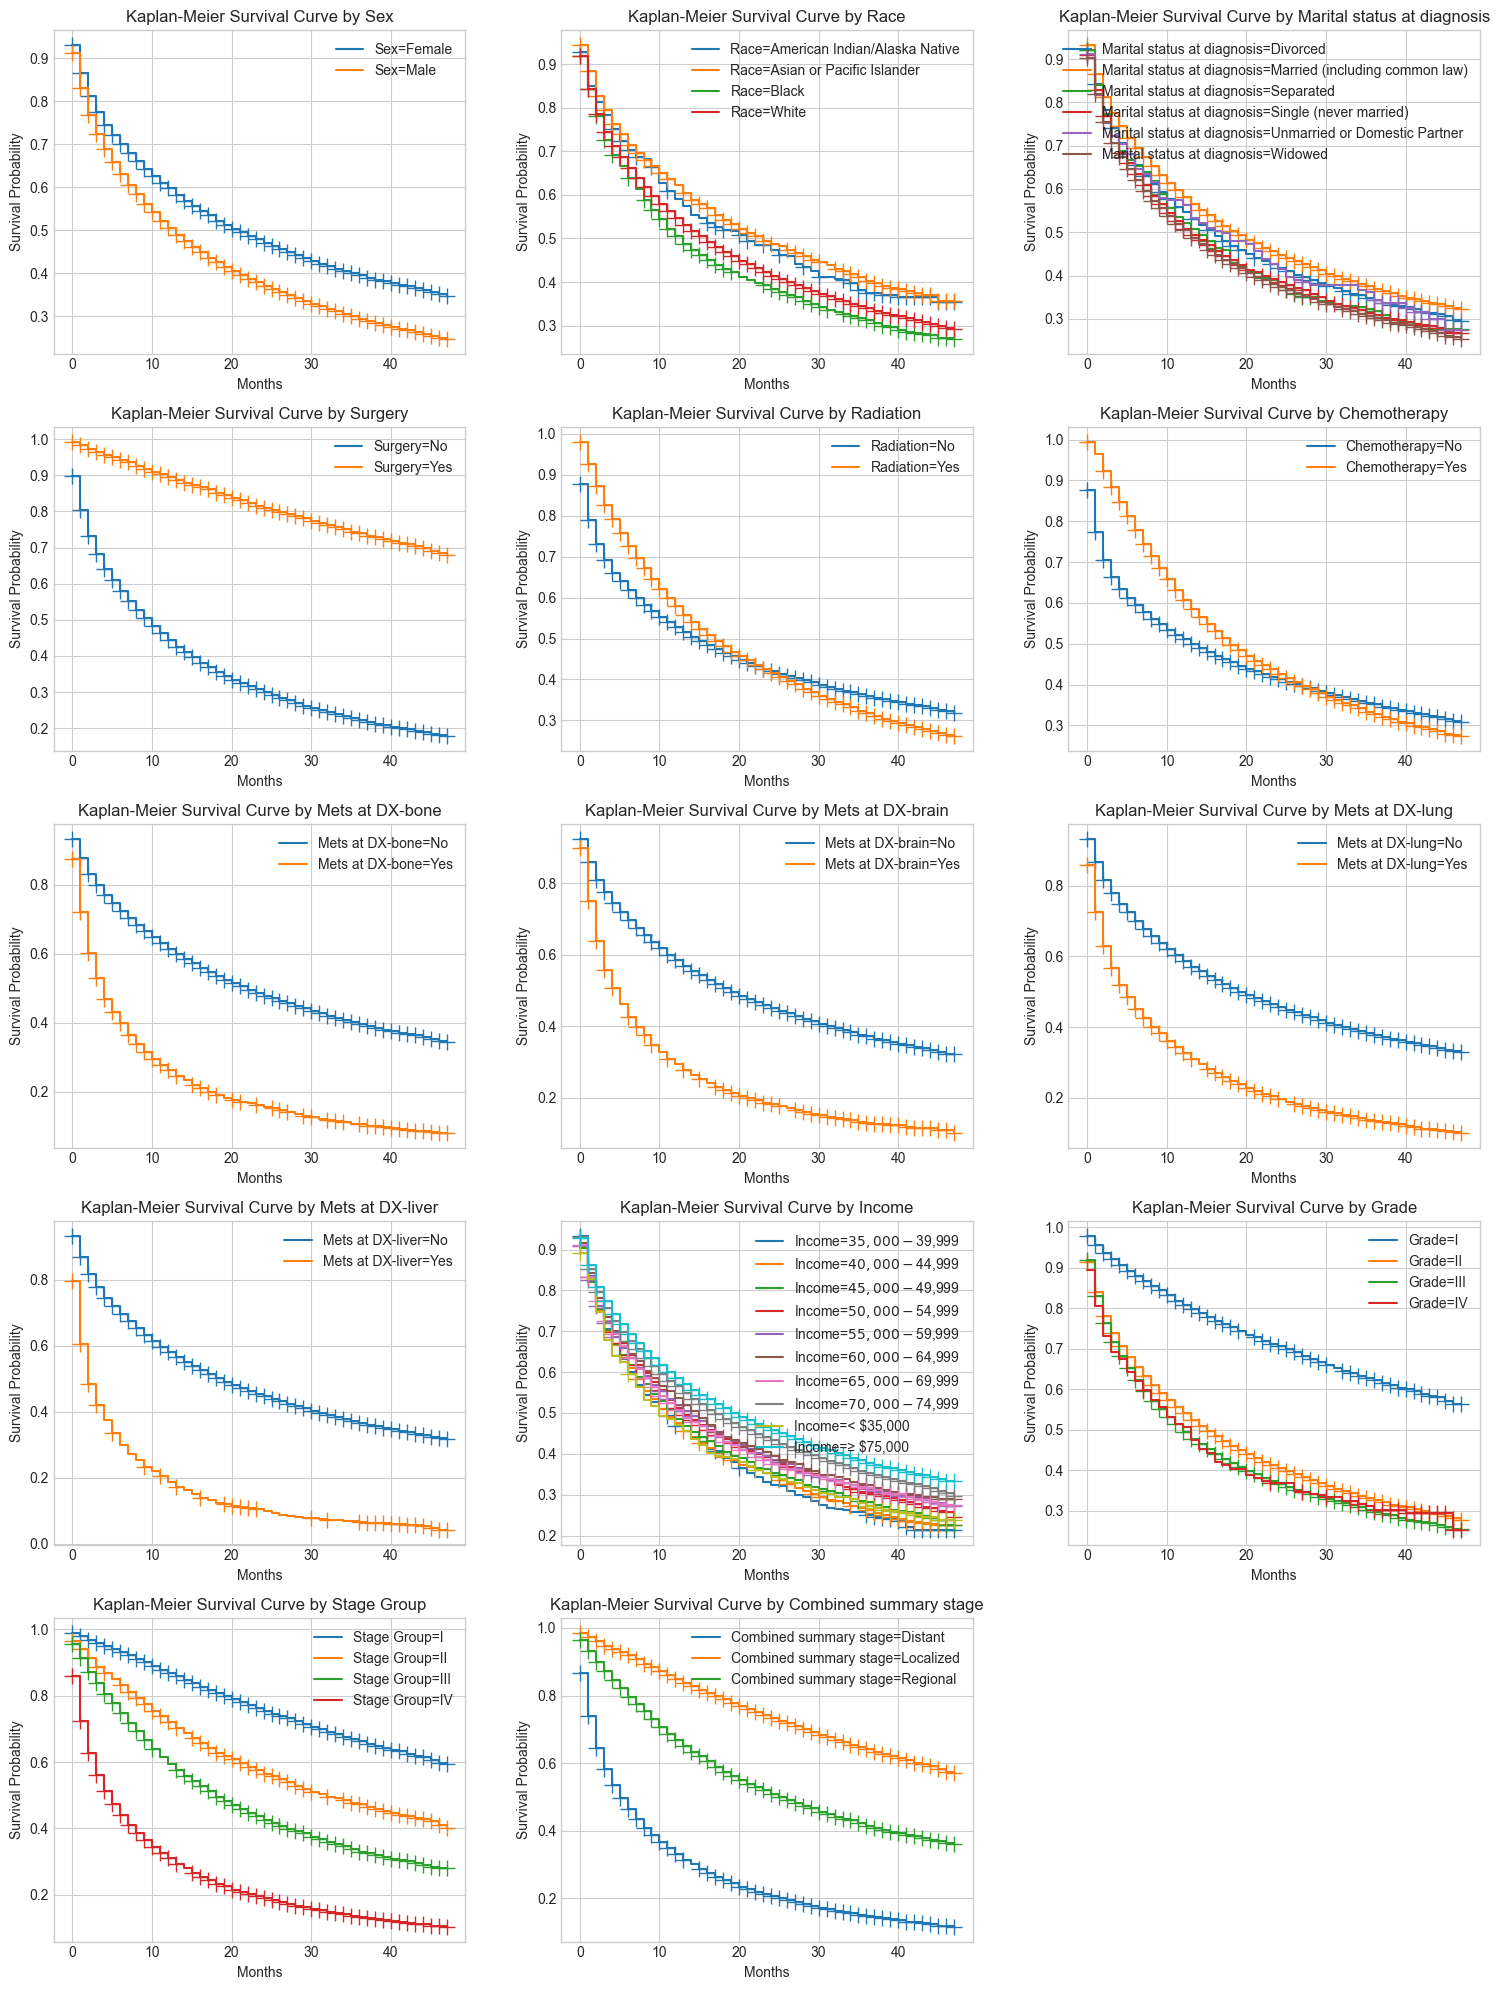

Sex: p-value = 0.0000 (significant)
Race:
  American Indian/Alaska Native vs Asian or Pacific Islander: p-value = 0.4680 (not significant)
  American Indian/Alaska Native vs Black: p-value = 0.0020 (significant)
  American Indian/Alaska Native vs White: p-value = 0.0453 (significant)
  Asian or Pacific Islander vs Black: p-value = 0.0000 (significant)
  Asian or Pacific Islander vs White: p-value = 0.0000 (significant)
  Black vs White: p-value = 0.0001 (significant)
Marital status at diagnosis:
  Divorced vs Married (including common law): p-value = 0.0000 (significant)
  Divorced vs Separated: p-value = 0.2042 (not significant)
  Divorced vs Single (never married): p-value = 0.0003 (significant)
  Divorced vs Unmarried or Domestic Partner: p-value = 0.8595 (not significant)
  Divorced vs Widowed: p-value = 0.0000 (significant)
  Married (including common law) vs Separated: p-value = 0.0043 (significant)
  Married (including common law) vs Single (never married): p-value = 0.0000 (sig

In [119]:
from lifelines.statistics import logrank_test
import itertools

# Create Kaplan-Meier model object
kmf = KaplanMeierFitter()

# Set plot style
plt.style.use('seaborn-whitegrid')

# Get all categorical variable column names
categorical_cols = ['Sex', 'Race', 'Marital status at diagnosis', 'Surgery', 
                    'Radiation', 'Chemotherapy', 'Mets at DX-bone', 'Mets at DX-brain', 
                    'Mets at DX-lung', 'Mets at DX-liver', 'Income', 'Grade', 
                    'Stage Group', 'Combined summary stage']

# Plot Kaplan-Meier curves and perform log-rank tests for all categorical variables
plt.figure(figsize=(15, 20))
logrank_results = {}
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(5, 3, i)
    for name, group in df_new1.groupby(col):
        kmf.fit(group['Survival months'], event_observed=group['Vital status'], label=f'{col}={name}')
        kmf.plot(show_censors=True, ci_show=False)  # Show censoring, do not show confidence interval
    
    # Perform log-rank test or pairwise log-rank test
    groups = df_new1[col].unique()
    if len(groups) == 2:
        group1 = df_new1[df_new1[col] == groups[0]]
        group2 = df_new1[df_new1[col] == groups[1]]
        result = logrank_test(group1['Survival months'], group2['Survival months'],
                              event_observed_A=group1['Vital status'], event_observed_B=group2['Vital status'])
        p_value = result.p_value
        logrank_results[col] = p_value
    else:
        p_values = []
        for (name1, group1), (name2, group2) in itertools.combinations(df_new1.groupby(col), 2):
            result = logrank_test(group1['Survival months'], group2['Survival months'],
                                  event_observed_A=group1['Vital status'], event_observed_B=group2['Vital status'])
            p_values.append((f'{name1} vs {name2}', result.p_value))
        
        logrank_results[col] = p_values

    plt.title(f'Kaplan-Meier Survival Curve by {col}')
    plt.xlabel('Months')
    plt.ylabel('Survival Probability')
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Print log-rank test results with significance indication
def print_significance(p_value):
    if p_value <= 0.05:
        return " (significant)"
    else:
        return " (not significant)"

for col, results in logrank_results.items():
    if isinstance(results, list):
        print(f'{col}:')
        for pair, p_value in results:
            print(f'  {pair}: p-value = {p_value:.4f}{print_significance(p_value)}')
    else:
        print(f'{col}: p-value = {results:.4f}{print_significance(results)}')

### Correlation

In [243]:
# Create mapping dictionaries
income_mapping = {'< $35,000': 0, '$35,000 - $39,999': 1, '$40,000 - $44,999': 2, '$45,000 - $49,999': 3, '$50,000 - $54,999': 4,
                  '$55,000 - $59,999': 5, '$60,000 - $64,999': 6, '$65,000 - $69,999': 7, '$70,000 - $74,999': 8, '≥ $75,000': 9}
grade_mapping = {'Ⅰ': 0, 'Ⅱ': 1, 'Ⅲ': 2, 'Ⅳ': 3}
stage_mapping = {'Ⅰ': 0, 'Ⅱ': 1, 'Ⅲ': 2, 'Ⅳ': 3}
summary_stage_mapping = {'Localized': 0, 'Regional': 1, 'Distant': 2}

# Encode the ordinal variables
df_new['Income'] = df_new['Income'].map(income_mapping)

df_new['Grade'] = df_new['Grade'].map(grade_mapping)

df_new['Stage Group'] = df_new['Stage Group'].map(stage_mapping)

df_new['Combined summary stage'] = df_new['Combined summary stage'].map(summary_stage_mapping)


In [244]:
df_new = pd.concat([df_new, df[['Tumor Size', 'Age']]], axis=1)

In [245]:
df_new

Sex   Race     Marital status at diagnosis Surgery Radiation  \
0      Female  White  Married (including common law)      No        No   
1      Female  White                         Widowed      No        No   
2      Female  White                        Divorced      No        No   
3      Female  White                        Divorced     Yes        No   
4      Female  White  Married (including common law)      No       Yes   
...       ...    ...                             ...     ...       ...   
34787    Male  White                         Widowed      No        No   
34788    Male  Black  Married (including common law)      No        No   
34789    Male  White  Married (including common law)     Yes        No   
34790  Female  White  Married (including common law)      No       Yes   
34791    Male  White  Married (including common law)      No       Yes   

      Chemotherapy Mets at DX-bone Mets at DX-brain Mets at DX-lung  \
0               No             Yes               No              No   
1               No             Yes               No             Yes   
2               No              No               No              No   
3               No              No               No              No   
4               No              No               No              No   
...            ...             ...              ...             ...   
34787           No              No               No              No   
34788          Yes              No               No              No   
34789           No              No               No              No   
34790          Yes              No               No             Yes   
34791          Yes             Yes               No              No   

      Mets at DX-liver  Income  Grade  Stage Group  Combined summary stage  \
0                   No       9      2            3                       2   
1                  Yes       9      1            3                       2   
2                   No       9      1            3                       2   
3                   No       9      1            1                       1   
4                   No       9      2            2                       1   
...                ...     ...    ...          ...                     ...   
34787               No       3      1            2                       1   
34788               No       5      1            3                       2   
34789               No       5      1            0                       0   
34790               No       5      2            3                       2   
34791               No       3      2            3                       2   

      Tumor Size  Age  
0             50   74  
1             56   78  
2             66   69  
3             23   79  
4             68   81  
...          ...  ...  
34787         93   79  
34788        NaN   43  
34789         32   60  
34790         44   56  
34791        NaN   67  

[34792 rows x 16 columns]

In [246]:
# Nominal variables
nominal_vars = ["Sex", "Race", "Marital status at diagnosis", "Surgery", "Radiation",
                "Chemotherapy", "Mets at DX-bone", "Mets at DX-brain", "Mets at DX-lung",
                "Mets at DX-liver"]

# Perform One-Hot encoding on nominal variables
df_new = pd.get_dummies(df_new, columns=nominal_vars)

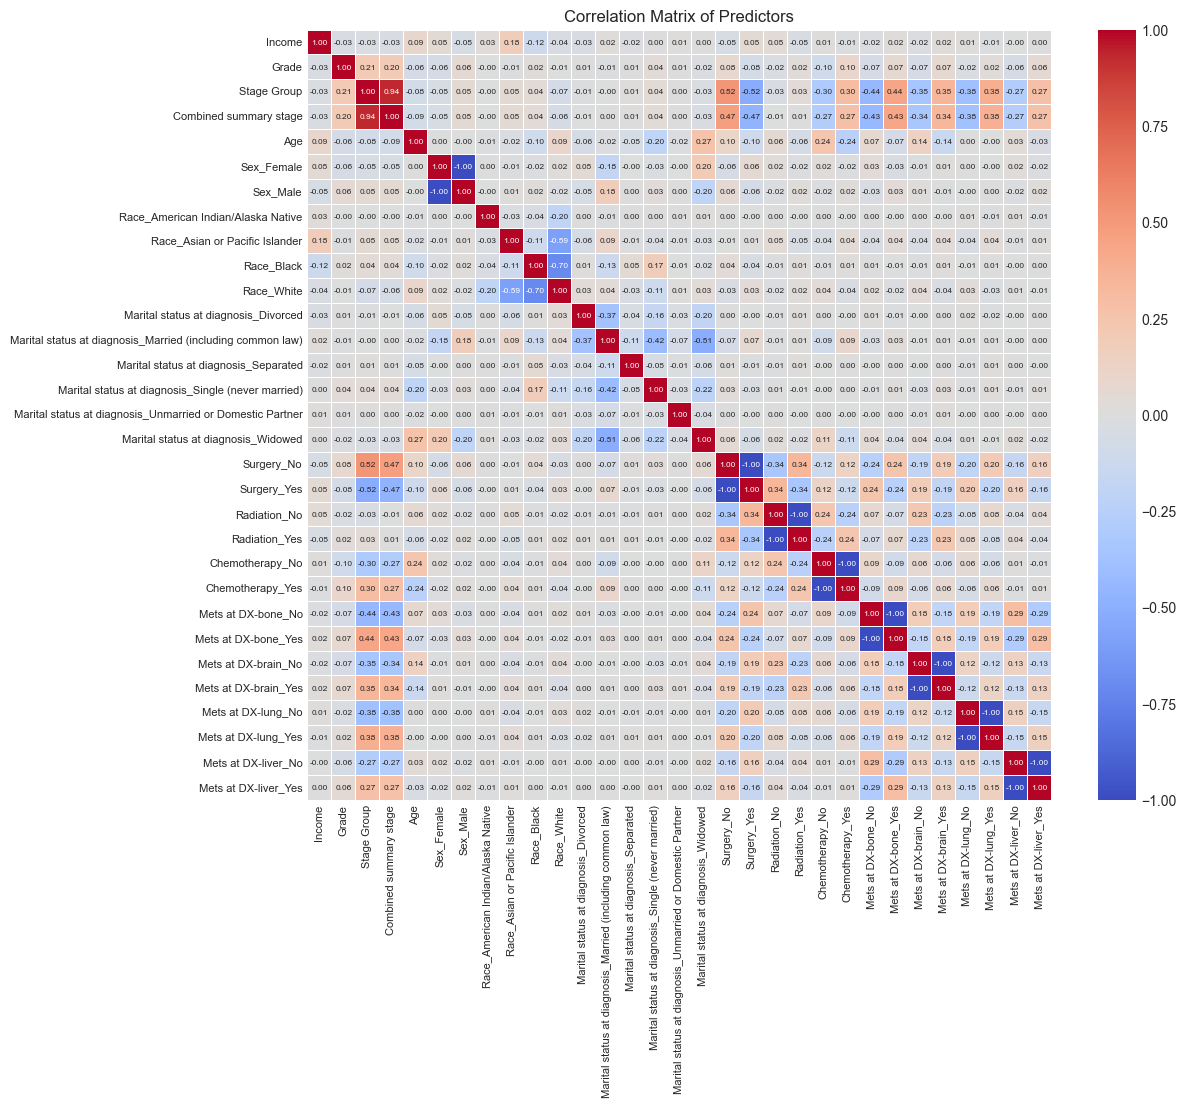

In [247]:
corr_matrix = df_new.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title('Correlation Matrix of Predictors', fontsize=12)  
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)  
plt.show()

## Normalisation

In [50]:
#  Normalisation using StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Age', 'Tumor Size']
x_train_df[columns_to_scale] = scaler.fit_transform(x_train_df[columns_to_scale])
x_test_df[columns_to_scale] = scaler.transform(x_test_df[columns_to_scale])

In [51]:
x_train_df.head()

Age  Median household income  Grade  Combined Summary Stage  \
6636   1.505685                        8      1                       0   
24979 -1.192046                        3      2                       2   
12378  0.506526                        8      1                       0   
15263  0.006946                        9      1                       0   
21547  0.406610                        5      1                       2   

       Stage Group  Tumor Size  Sex_Female  Sex_Male  \
6636             0   -0.068547         0.0       1.0   
24979            3   -0.242190         1.0       0.0   
12378            0   -0.242190         1.0       0.0   
15263            0   -1.145136         1.0       0.0   
21547            3    1.216414         0.0       1.0   

       Race_American Indian/Alaska Native  Race_Asian or Pacific Islander  \
6636                                  0.0                             0.0   
24979                                 0.0                             0.0   
12378                                 0.0                             0.0   
15263                                 0.0                             0.0   
21547                                 0.0                             0.0   

       ...  Chemotherapy_No  Chemotherapy_Yes  Mets at DX-bone_No  \
6636   ...              1.0               0.0                 1.0   
24979  ...              0.0               1.0                 0.0   
12378  ...              1.0               0.0                 1.0   
15263  ...              1.0               0.0                 1.0   
21547  ...              1.0               0.0                 1.0   

       Mets at DX-bone_Yes  Mets at DX-brain_No  Mets at DX-brain_Yes  \
6636                   0.0                  1.0                   0.0   
24979                  1.0                  1.0                   0.0   
12378                  0.0                  1.0                   0.0   
15263                  0.0                  1.0                   0.0   
21547                  0.0                  0.0                   1.0   

       Mets at DX-lung_No  Mets at DX-lung_Yes  Mets at DX-liver_No  \
6636                  1.0                  0.0                  1.0   
24979                 1.0                  0.0                  0.0   
12378                 1.0                  0.0                  1.0   
15263                 1.0                  0.0                  1.0   
21547                 1.0                  0.0                  1.0   

       Mets at DX-liver_Yes  
6636                    0.0  
24979                   1.0  
12378                   0.0  
15263                   0.0  
21547                   0.0  

[5 rows x 32 columns]

## Response Classification

We split the response 'Survival months' into 3 categories: '≤6 months', '7-24 months', '＞24 months'.

In [52]:
# Split the response y_surv into 3 categories: '≤6 months', '7-24 months', '＞24 months' for classification models
bins = [0, 6, 24, float('inf')]
labels = ['≤6 months', '7-24 months', '＞24 months']
y_train_category = pd.cut(y_surv_train, bins=bins, labels=labels, include_lowest=True)
y_test_category = pd.cut(y_surv_test, bins=bins, labels=labels, include_lowest=True)
print(y_train_category)
print(y_test_category)
# Calculate the percentage of each category
category_proportions = y_train_category.value_counts(normalize=True)
print("Category Proportions:")
print(category_proportions)

6636     7-24 months
24979      ≤6 months
12378     ＞24 months
15263     ＞24 months
21547      ≤6 months
            ...     
25212     ＞24 months
34368     ＞24 months
9771      ＞24 months
29939      ≤6 months
27336     ＞24 months
Name: Survival months, Length: 24354, dtype: category
Categories (3, object): ['≤6 months' < '7-24 months' < '＞24 months']
21203    7-24 months
33348      ≤6 months
22735     ＞24 months
28683      ≤6 months
10206      ≤6 months
            ...     
25401    7-24 months
4337      ＞24 months
2415      ＞24 months
24014    7-24 months
22527      ≤6 months
Name: Survival months, Length: 10438, dtype: category
Categories (3, object): ['≤6 months' < '7-24 months' < '＞24 months']
Category Proportions:
＞24 months     0.408516
≤6 months      0.341546
7-24 months    0.249938
Name: Survival months, dtype: float64


## Feature selection

In [ ]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_df, y_train_category)

# Obtain the importance of features
feature_importances_classifier = rf_classifier.feature_importances_
important_features_classifier = pd.Series(feature_importances_classifier, index=x_train_df.columns)
important_features_classifier_sorted = important_features_classifier.sort_values(ascending=False)

# Print features with importance > 0.02
print("Features with Importance > 0.02 (Classifier):")
for feature, importance in important_features_classifier_sorted.items():
    if importance > 0.02:
        print(f"{feature}: {importance:.4f}")

Features with Importance > 0.02 (Classifier):
Tumor Size: 0.2242
Age: 0.1774
Median household income: 0.1052
Stage Group: 0.0610
Combined Summary Stage: 0.0476
Grade: 0.0427
Surgery_No: 0.0321
Radiation_Yes: 0.0308
Chemotherapy_No: 0.0297
Chemotherapy_Yes: 0.0261
Surgery_Yes: 0.0253


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train_df, y_surv_train)

# Obtain the importance of features
feature_importances_regressor = rf_regressor.feature_importances_
important_features_regressor = pd.Series(feature_importances_regressor, index=x_train_df.columns)
important_features_regressor_sorted = important_features_regressor.sort_values(ascending=False)

# Print features with importance > 0.02
print("Features with Importance > 0.02 (Regressor):")
for feature, importance in important_features_regressor_sorted.items():
    if importance > 0.01:
        print(f"{feature}: {importance:.4f}")

Features with Importance > 0.02 (Regressor):
Stage Group: 0.2192
Tumor Size: 0.1793
Age: 0.1398
Median household income: 0.0687
Combined Summary Stage: 0.0465
Radiation_Yes: 0.0383
Surgery_No: 0.0374
Surgery_Yes: 0.0338
Grade: 0.0333
Chemotherapy_Yes: 0.0277
Chemotherapy_No: 0.0275
Marital status at diagnosis_Married (including common law): 0.0178
Marital status at diagnosis_Single (never married): 0.0123
Marital status at diagnosis_Widowed: 0.0122
Marital status at diagnosis_Divorced: 0.0117
Sex_Female: 0.0115
Sex_Male: 0.0112
Race_White: 0.0108


## Regression models

In [53]:
# Reset indices to ensure consistency
x_train_df = x_train_df.reset_index(drop=True)
x_test_df = x_test_df.reset_index(drop=True)
y_surv_train = y_surv_train.reset_index(drop=True)
y_surv_test = y_surv_test.reset_index(drop=True)
y_vital_train = y_vital_train.reset_index(drop=True)
y_vital_test = y_vital_test.reset_index(drop=True)

# Combine features and target variables
train_data_new = pd.concat([x_train_df, y_surv_train, y_vital_train], axis=1)
test_data_new = pd.concat([x_test_df, y_surv_test, y_vital_test], axis=1)

# Map 'Alive' to 0 and 'Dead' to 1
train_data_new['Vital status'] = train_data_new['Vital status'].map({'Alive': 0, 'Dead': 1})
test_data_new['Vital status'] = test_data_new['Vital status'].map({'Alive': 0, 'Dead': 1})

# Function to convert DataFrame to structured array for scikit-survival
def df_to_structured(df, event_col, time_col):
    return np.array([(e, t) for e, t in zip(df[event_col], df[time_col])], dtype=[('event', bool), ('time', np.float64)])

# Convert training and testing data
y_train_structured = df_to_structured(train_data_new, 'Vital status', 'Survival months')
y_test_structured = df_to_structured(test_data_new, 'Vital status', 'Survival months')

### 1. Cox Proportional Hazards Model

####  Mean (lifelines：without inbuilt gridsearch method to perform hyperparameter tuning) 

       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       14.423055
1                    2             1                       23.193215
2                   31             1                       34.820741
3                    6             0                       15.263463
4                    4             1                       29.817649
...                ...           ...                             ...
10433               12             1                       20.667108
10434               28             1                       33.128178
10435               41             0                        5.982261
10436               10             1                       18.659385
10437                1             1                        7.096124

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Mean Prediction: 13.126123235141709
Root Relative Mean Squared Error (RRMSE) with Mean Prediction: 0.648021200

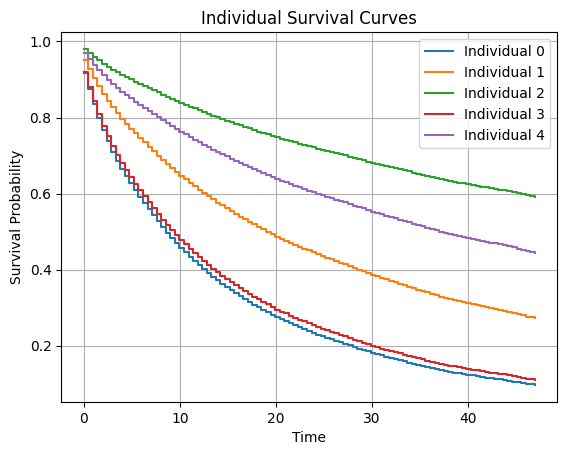

CPU times: total: 562 ms
Wall time: 2.2 s


In [68]:
%%time
from lifelines import CoxPHFitter
from lifelines.utils import median_survival_times
from lifelines.utils import concordance_index

# Train the Cox Proportional Hazards model with L2 regularization
coxph = CoxPHFitter(penalizer=0.01)
coxph.fit(train_data_new, duration_col='Survival months', event_col='Vital status')

# Predict the mean survival time for each individual in the test set
predicted_means  = coxph.predict_expectation(test_data_new.drop(['Vital status', 'Survival months'], axis=1))

# Convert the predictions to a DataFrame for further processing
predicted_means = pd.DataFrame(predicted_means, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results = pd.concat([test_data_new.reset_index(drop=True), predicted_means.reset_index(drop=True)], axis=1)
print(results[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']] )

# Calculate RMSE for Mean Predictions
mse_mean = mean_squared_error(results['Survival months'], results['Predicted Survival Time (Mean)'])
rmse_mean = np.sqrt(mse_mean)
print("Root Mean Squared Error (RMSE) with Mean Prediction:", rmse_mean)

# Calculate RRMSE
mean_observed = np.mean(results['Survival months'])
rrmse_mean = rmse_mean / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results['Survival months'], results['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Calculate C-index
c_index = coxph.score(test_data_new, scoring_method="concordance_index")
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
print("Concordance Index (C-index) of testing set:", c_index)

# Estimate the survival function for each individual in the test set
test_data_survival_curves = coxph.predict_survival_function(test_data_new, times=np.linspace(0, max(y_surv_train), 100))

# Visualize the survival curves
for i in range(min(5, len(test_data_survival_curves.columns))):  # Plot survival curves for the first 5 individuals
    plt.step(test_data_survival_curves.index, test_data_survival_curves.iloc[:, i], where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.grid(True)
plt.show()

#### 5-fold cv

Average Root Mean Squared Error (RMSE) with Mean Prediction: 13.112200457821507
Average Root Relative Mean Squared Error (RRMSE) with Mean Prediction: 0.6509252418955561
Average Mean Absolute Error (MAE) with Mean Prediction: 10.20572185024629
Average Concordance Index (C-index) of testing set: 0.7749061976718664


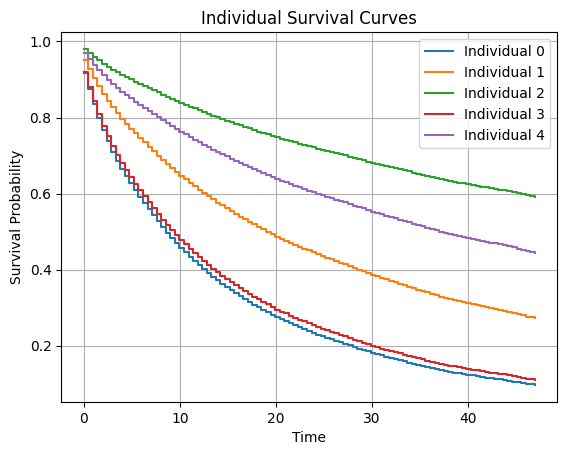

In [26]:

# Prepare the data
X = train_data_new.drop(['Survival months', 'Vital status'], axis=1)
y = train_data_new[['Survival months', 'Vital status']]

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics
rmse_list = []
rrmse_list = []
mae_list = []
c_index_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Combine features and target variables for the train and test sets
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    # Train the Cox Proportional Hazards model
    coxph = CoxPHFitter(penalizer=0.01)
    coxph.fit(train_data, duration_col='Survival months', event_col='Vital status')

    # Predict the mean survival time for each individual in the test set
    predicted_means = coxph.predict_expectation(X_test)

    # Convert the predictions to a DataFrame for further processing
    predicted_means = pd.DataFrame(predicted_means, columns=['Predicted Survival Time (Mean)'])

    # Merge the prediction results with the actual test data
    results = pd.concat([test_data.reset_index(drop=True), predicted_means.reset_index(drop=True)], axis=1)

    # Calculate RMSE for Mean Predictions
    mse_mean = mean_squared_error(results['Survival months'], results['Predicted Survival Time (Mean)'])
    rmse_mean = np.sqrt(mse_mean)
    rmse_list.append(rmse_mean)

    # Calculate RRMSE
    mean_observed = np.mean(results['Survival months'])
    rrmse_mean = rmse_mean / mean_observed
    rrmse_list.append(rrmse_mean)

    # Calculate MAE for Mean Predictions
    mae_mean = mean_absolute_error(results['Survival months'], results['Predicted Survival Time (Mean)'])
    mae_list.append(mae_mean)

    # Calculate C-index
    c_index = coxph.score(test_data, scoring_method="concordance_index")
    c_index_list.append(c_index)

# Print average metrics across all folds
print("Average Root Mean Squared Error (RMSE) with Mean Prediction:", np.mean(rmse_list))
print("Average Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", np.mean(rrmse_list))
print("Average Mean Absolute Error (MAE) with Mean Prediction:", np.mean(mae_list))
print("Average Concordance Index (C-index) of testing set:", np.mean(c_index_list))

# Train final model on the entire training dataset
coxph_final = CoxPHFitter(penalizer=0.01)
coxph_final.fit(train_data_new, duration_col='Survival months', event_col='Vital status')

# Estimate the survival function for each individual in the test set
test_data_survival_curves = coxph_final.predict_survival_function(test_data_new, times=np.linspace(0, max(y_surv_train), 100))

# Visualize the survival curves
for i in range(min(5, len(test_data_survival_curves.columns))):  # Plot survival curves for the first 5 individuals
    plt.step(test_data_survival_curves.index, test_data_survival_curves.iloc[:, i], where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.grid(True)
plt.show()


#### Median

[ 9. 19. 47. ...  3. 13.  4.]
       Survival months  Vital status  Predicted Survival Time (Median)
0                   19             1                               9.0
1                    2             1                              19.0
2                   31             1                              47.0
3                    6             0                              10.0
4                    4             1                              38.0
...                ...           ...                               ...
10433               12             1                              16.0
10434               28             1                              47.0
10435               41             0                               3.0
10436               10             1                              13.0
10437                1             1                               4.0

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Median Prediction: 15.169872245702942
Root Relative Mean

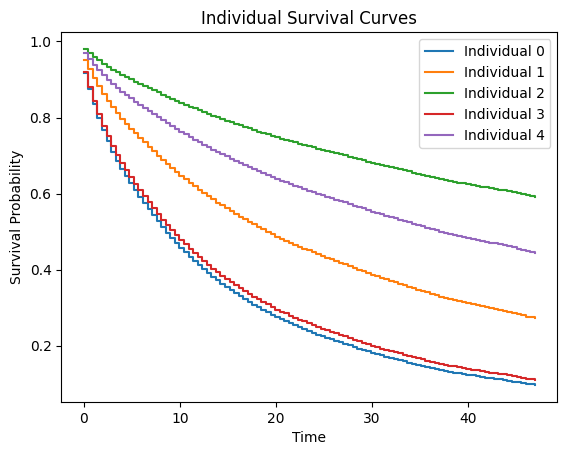

CPU times: total: 1.12 s
Wall time: 2.54 s


In [69]:
%%time

# Train the Cox Proportional Hazards model with L2 regularization
coxph = CoxPHFitter(penalizer=0.01)
coxph.fit(train_data_new, duration_col='Survival months', event_col='Vital status')

# Predict the median survival time for each individual in the test set
predicted_medians = coxph.predict_median(test_data_new.drop(['Vital status', 'Survival months'], axis=1))

predicted_medians = np.where(np.isinf(predicted_medians), 47, predicted_medians)
print(predicted_medians)

# Convert the predictions to a DataFrame for further processing
predicted_medians = pd.DataFrame(predicted_medians, columns=['Predicted Survival Time (Median)'])

# Merge the prediction results with the actual test data
results = pd.concat([test_data_new.reset_index(drop=True), predicted_medians.reset_index(drop=True)], axis=1)
print(results[['Survival months', 'Vital status', 'Predicted Survival Time (Median)']] )

# Calculate RMSE for Median Predictions
mse_median = mean_squared_error(results['Survival months'], results['Predicted Survival Time (Median)'])
rmse_median = np.sqrt(mse_median)
print("Root Mean Squared Error (RMSE) with Median Prediction:", rmse_median)

# Calculate RRMSE
mean_observed = np.mean(results['Survival months'])
rrmse_median = rmse_median / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Median Prediction:", rrmse_median)

# Calculate MAE for Mean Predictions
mae_median = mean_absolute_error(results['Survival months'], results['Predicted Survival Time (Median)'])
print("Mean Absolute Error (MAE) with Median Prediction:", mae_median)

# Calculate C-index
c_index = coxph.score(test_data_new, scoring_method="concordance_index")
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
print("Concordance Index (C-index) of testing set:", c_index)

# Estimate the survival function for each individual in the test set
test_data_survival_curves = coxph.predict_survival_function(test_data_new, times=np.linspace(0, max(y_surv_train), 100))

# Visualize the survival curves
for i in range(min(5, len(test_data_survival_curves.columns))):  # Plot survival curves for the first 5 individuals
    plt.step(test_data_survival_curves.index, test_data_survival_curves.iloc[:, i], where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.show()

#### Hyperparameter tuning

Penalizer: 0.0001, Mean RMSE: 13.13216700003245
Penalizer: 0.000774263682681127, Mean RMSE: 13.130339580351897
Penalizer: 0.005994842503189409, Mean RMSE: 13.120927310581996
Penalizer: 0.046415888336127774, Mean RMSE: 13.083556101348389
Penalizer: 0.3593813663804626, Mean RMSE: 13.02144426575941
Penalizer: 2.782559402207126, Mean RMSE: 14.087959211048059
Penalizer: 21.54434690031882, Mean RMSE: 16.247330827276226
Penalizer: 166.81005372000558, Mean RMSE: 16.962397242949912
Penalizer: 1291.5496650148827, Mean RMSE: 17.071647106761155
Penalizer: 10000.0, Mean RMSE: 17.086081523851593
Best Penalizer: 0.3593813663804626, Best Mean RMSE: 13.02144426575941
       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       15.569164
1                    2             1                       22.890884
2                   31             1                       30.832365
3                    6             0                       14.951

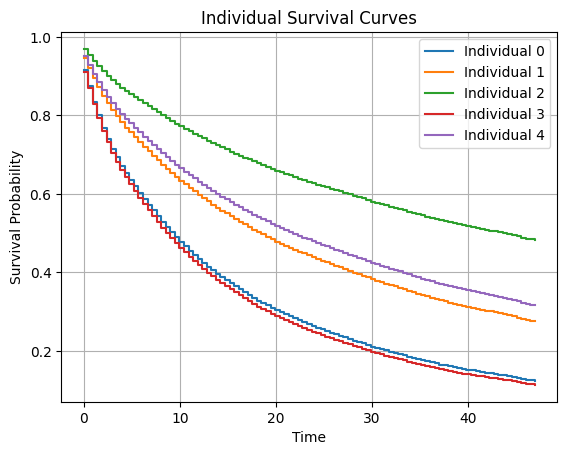

In [60]:
# Define a range of penalizer values to try
penalizer_values = np.logspace(-4, 4, 10)  # Creates an array of values from 10^-4 to 10^4

# Function to perform cross-validation and evaluate RMSE
def cross_validate_coxph(penalizer, train_data, n_splits=5):
    kf = KFold(n_splits=n_splits)
    rmses = []
    
    for train_index, val_index in kf.split(train_data):
        train_split = train_data.iloc[train_index]
        val_split = train_data.iloc[val_index]
        
        coxph = CoxPHFitter(penalizer=penalizer)
        coxph.fit(train_split, duration_col='Survival months', event_col='Vital status')
        
        predicted_means = coxph.predict_expectation(val_split.drop(['Vital status', 'Survival months'], axis=1))
        
        mse_mean = mean_squared_error(val_split['Survival months'], predicted_means)
        rmse_mean = np.sqrt(mse_mean)
        rmses.append(rmse_mean)
    
    return np.mean(rmses)

# Perform cross-validation for each penalizer value and store results
results = []

for penalizer in penalizer_values:
    mean_rmse = cross_validate_coxph(penalizer, train_data_new)
    results.append((penalizer, mean_rmse))
    print(f"Penalizer: {penalizer}, Mean RMSE: {mean_rmse}")

# Find the penalizer value with the lowest RMSE
best_penalizer, best_rmse = min(results, key=lambda x: x[1])
print(f"Best Penalizer: {best_penalizer}, Best Mean RMSE: {best_rmse}")

# Train the Cox Proportional Hazards model with the best penalizer
coxph_final = CoxPHFitter(penalizer=best_penalizer)
coxph_final.fit(train_data_new, duration_col='Survival months', event_col='Vital status')

# Predict the mean survival time for each individual in the test set
predicted_means = coxph_final.predict_expectation(test_data_new.drop(['Vital status', 'Survival months'], axis=1))

# Convert the predictions to a DataFrame for further processing
predicted_means = pd.DataFrame(predicted_means, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results = pd.concat([test_data_new.reset_index(drop=True), predicted_means.reset_index(drop=True)], axis=1)
print(results[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean = mean_squared_error(results['Survival months'], results['Predicted Survival Time (Mean)'])
rmse_mean = np.sqrt(mse_mean)
print("Root Mean Squared Error (RMSE) with Mean Prediction:", rmse_mean)

# Calculate RRMSE
mean_observed = np.mean(results['Survival months'])
rrmse_mean = rmse_mean / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results['Survival months'], results['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Calculate C-index
c_index = coxph_final.score(test_data_new, scoring_method="concordance_index")
print("Concordance Index (C-index) of testing set:", c_index)

# Estimate the survival function for each individual in the test set
test_data_survival_curves_cox = coxph_final.predict_survival_function(test_data_new, times=np.linspace(0, max(y_surv_train), 100))

# Visualize the survival curves
for i in range(min(5, len(test_data_survival_curves_cox.columns))):  # Plot survival curves for the first 5 individuals
    plt.step(test_data_survival_curves_cox.index, test_data_survival_curves_cox.iloc[:, i], where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.grid(True)
plt.show()

### 2. Random Survival Forest

#### Mean

       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       20.710437
1                    2             1                       20.977108
2                   31             1                       37.419136
3                    6             0                       16.330637
4                    4             1                       22.744550
...                ...           ...                             ...
10433               12             1                       20.763235
10434               28             1                       28.336224
10435               41             0                        5.163056
10436               10             1                       21.560703
10437                1             1                        4.911282

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Random Survival Forest Mean Prediction: 13.007974836634569
Root Relative Mean Squared Error (RRMSE) with Mean 

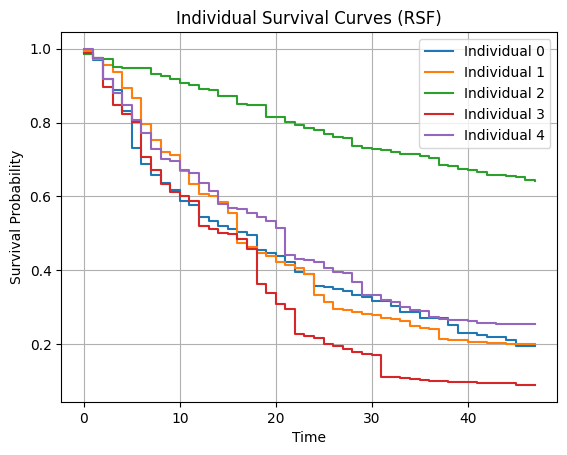

CPU times: total: 4min 50s
Wall time: 7min 58s


In [70]:
%%time

# Initialize and train the Random Survival Forest model
rsf = RandomSurvivalForest(n_jobs=-1, random_state=42)
rsf.fit(x_train_df, y_train_structured)

# Predict survival functions for the test set
test_surv_curves_rsf = rsf.predict_survival_function(x_test_df, return_array=False)

# Calculate mean survival time for each individual
def mean_survival_time_rsfs(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_rsf = mean_survival_time_rsfs(test_surv_curves_rsf)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_rsf, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_rsf = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_rsf[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_rsf = mean_squared_error(results_rsf['Survival months'], results_rsf['Predicted Survival Time (Mean)'])
rmse_mean_rsf = np.sqrt(mse_mean_rsf)
print("Root Mean Squared Error (RMSE) with Random Survival Forest Mean Prediction:", rmse_mean_rsf)

# Calculate RRMSE
mean_observed = np.mean(results_rsf['Survival months'])
rrmse_mean = rmse_mean_rsf / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate C-index
c_index = rsf.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
print("Concordance Index (C-index) of testing set:", c_index)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_rsf['Survival months'], results_rsf['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves_rsf))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves_rsf[i].x, test_surv_curves_rsf[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (RSF)')
plt.legend()
plt.grid(True)
plt.show()

#### Median

       Survival months  Vital status  Predicted Survival Time (Median)
0                   19             1                              17.0
1                    2             1                              16.0
2                   31             1                              47.0
3                    6             0                              15.0
4                    4             1                              21.0
...                ...           ...                               ...
10433               12             1                              19.0
10434               28             1                              29.0
10435               41             0                               2.0
10436               10             1                              20.0
10437                1             1                               1.0

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Random Survival Forest Median Prediction: 14.759864897858225
Root Relative Mean Square

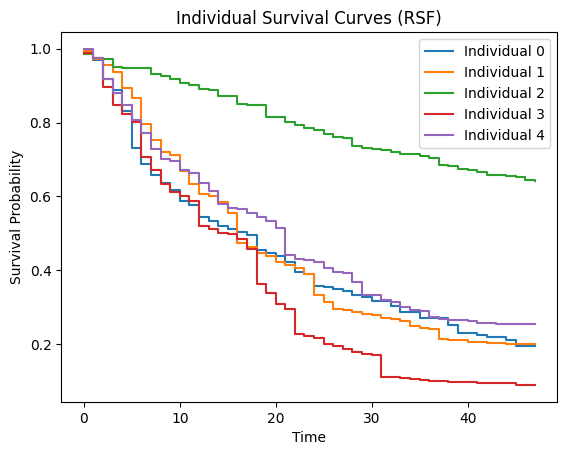

CPU times: total: 20.9 s
Wall time: 40.2 s


In [71]:
%%time

# Initialize and train the Random Survival Forest model
rsf = RandomSurvivalForest(random_state=42)
rsf.fit(train_data_new.drop(['Vital status', 'Survival months'], axis=1), y_train_structured)

# Predict survival functions for the test set
test_surv_curves = rsf.predict_survival_function(test_data_new.drop(['Vital status', 'Survival months'], axis=1), return_array=False)

# Define a function to calculate the median survival time from the survival function
def median_survival_time_rsfs(surv_funcs):
    median_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        if any(survival_probs <= 0.5):
            median_time = times[survival_probs <= 0.5][0]
        else:
            median_time = times[-1]  # If never reaches 0.5, return the maximum time value
        median_times.append(median_time)
    return np.array(median_times)

predicted_medians_rsf = median_survival_time_rsfs(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_medians_df = pd.DataFrame(predicted_medians_rsf, columns=['Predicted Survival Time (Median)'])

# Merge the prediction results with the actual test data
results_rsf = pd.concat([test_data_new.reset_index(drop=True), predicted_medians_df.reset_index(drop=True)], axis=1)
print(results_rsf[['Survival months', 'Vital status', 'Predicted Survival Time (Median)']])

# Calculate RMSE for Median Predictions
mse_median_rsf = mean_squared_error(results_rsf['Survival months'], results_rsf['Predicted Survival Time (Median)'])
rmse_median_rsf = np.sqrt(mse_median_rsf)
print("Root Mean Squared Error (RMSE) with Random Survival Forest Median Prediction:", rmse_median_rsf)

# Calculate RRMSE
mean_observed = np.mean(results_rsf['Survival months'])
rrmse_median = rmse_median_rsf / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_median)

# Calculate MAE for Mean Predictions
mae_median = mean_absolute_error(results_rsf['Survival months'], results_rsf['Predicted Survival Time (Median)'])
print("Mean Absolute Error (MAE) with Median Prediction:", mae_median)

# Calculate C-index
c_index = rsf.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
print("Concordance Index (C-index) of testing set:", c_index)


# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (RSF)')
plt.legend()
plt.show()

#### Hyparameter tuning

In [29]:
%%time
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Initialize RandomSurvivalForest
rsf = RandomSurvivalForest(n_jobs=-1, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rsf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(train_data_new.drop(['Vital status', 'Survival months'], axis=1), y_train_structured)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Extract the best parameters
best_params = grid_search.best_params_


c:\Users\小敏\.conda\envs\PY37\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
CPU times: total: 1min 24s
Wall time: 44min 18s


       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       20.130670
1                    2             1                       22.359099
2                   31             1                       37.264445
3                    6             0                       16.988246
4                    4             1                       21.825695
...                ...           ...                             ...
10433               12             1                       19.371331
10434               28             1                       27.735714
10435               41             0                        6.978365
10436               10             1                       20.964374
10437                1             1                        6.067790

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Optimized Random Survival Forest Mean Prediction: 12.981092876569845
Root Relative Mean Squared Error (RRMSE) 

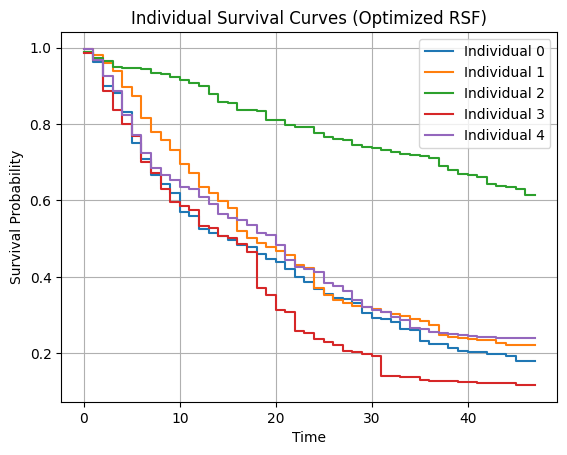

In [61]:
# Initialize the Random Survival Forest with the best parameters
rsf_best = RandomSurvivalForest(n_estimators=50,
                                min_samples_split=10,
                                min_samples_leaf=5,
                                n_jobs=-1, random_state=42)

# Train the final model
rsf_best.fit(train_data_new.drop(['Vital status', 'Survival months'], axis=1), y_train_structured)

# Convert test data
y_test_structured = df_to_structured(test_data_new, 'Vital status', 'Survival months')

# Predict survival functions for the test set
test_surv_curves_best = rsf_best.predict_survival_function(test_data_new.drop(['Vital status', 'Survival months'], axis=1), return_array=False)

# Calculate mean survival time for each individual
def mean_survival_time_rsfs(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_rsf_best = mean_survival_time_rsfs(test_surv_curves_best)

# Convert the predictions to a DataFrame for further processing
predicted_means_df_best = pd.DataFrame(predicted_means_rsf_best, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_rsf_best = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df_best.reset_index(drop=True)], axis=1)
print(results_rsf_best[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_rsf_best = mean_squared_error(results_rsf_best['Survival months'], results_rsf_best['Predicted Survival Time (Mean)'])
rmse_mean_rsf_best = np.sqrt(mse_mean_rsf_best)
print("Root Mean Squared Error (RMSE) with Optimized Random Survival Forest Mean Prediction:", rmse_mean_rsf_best)

# Calculate RRMSE
mean_observed = np.mean(results_rsf_best['Survival months'])
rrmse_mean = rmse_mean_rsf_best / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate C-index
c_index = rsf_best.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
print("Concordance Index (C-index) of testing set:", c_index)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_rsf_best['Survival months'], results_rsf_best['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves_best))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves_best[i].x, test_surv_curves_best[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (Optimized RSF)')
plt.legend()
plt.grid(True)
plt.show()


### 3. GradientBoostingSurvivalAnalysis

#### Mean

In [72]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
# Initialize and train the Gradient Boosting Survival Analysis model
gbm = GradientBoostingSurvivalAnalysis(random_state=42)
gbm.fit(x_train_df, y_train_structured)


CPU times: total: 8min 50s
Wall time: 17min 42s


GradientBoostingSurvivalAnalysis(random_state=42)

       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       18.204676
1                    2             1                       21.472229
2                   31             1                       36.675775
3                    6             0                       17.979337
4                    4             1                       24.861167
...                ...           ...                             ...
10433               12             1                       18.283831
10434               28             1                       25.327043
10435               41             0                        4.499819
10436               10             1                       19.360783
10437                1             1                        6.215095

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with GBM Mean Prediction: 12.81623097914304
Root Relative Mean Squared Error (RRMSE) with Mean Prediction: 0.632722

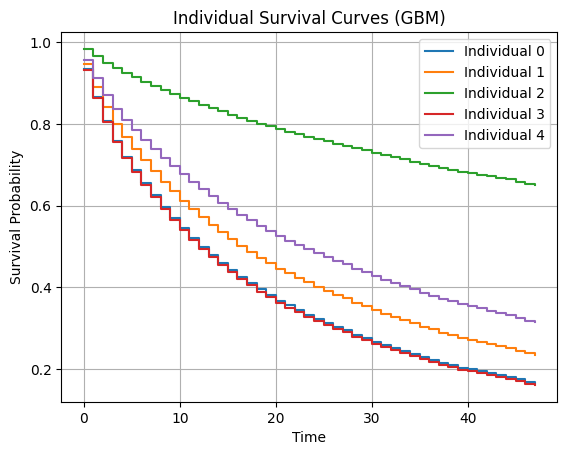

In [73]:
# Predict survival functions for the test set
test_surv_curves = gbm.predict_survival_function(x_test_df)

# Calculate mean survival time for each individual
def mean_survival_time_gbm(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_gbm = mean_survival_time_gbm(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_gbm, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_gbm = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_gbm[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_gbm = mean_squared_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Mean)'])
rmse_mean_gbm = np.sqrt(mse_mean_gbm)
print("Root Mean Squared Error (RMSE) with GBM Mean Prediction:", rmse_mean_gbm)

# Calculate RRMSE
mean_observed = np.mean(results_gbm['Survival months'])
rrmse_mean = rmse_mean_gbm / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Calculate C-index
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
c_index = gbm.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (GBM)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
# Initialize and train the Gradient Boosting Survival Analysis model
gbm = GradientBoostingSurvivalAnalysis(learning_rate=0.1, n_estimators=200, min_samples_split=5, min_samples_leaf=5, random_state=42)
gbm.fit(x_train_df, y_train_structured)

CPU times: total: 23min 10s
Wall time: 23min 10s


GradientBoostingSurvivalAnalysis(min_samples_leaf=5, min_samples_split=5,
                                 n_estimators=200, random_state=42)

       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       20.367741
1                    2             1                       20.683204
2                   31             1                       36.384574
3                    6             0                       17.322434
4                    4             1                       26.791143
...                ...           ...                             ...
10433               12             1                       17.635718
10434               28             1                       25.215716
10435               41             0                        3.763500
10436               10             1                       19.977890
10437                1             1                        6.005758

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with GBM Mean Prediction: 12.840283131927622
Root Relative Mean Squared Error (RRMSE) with Mean Prediction: 0.63390

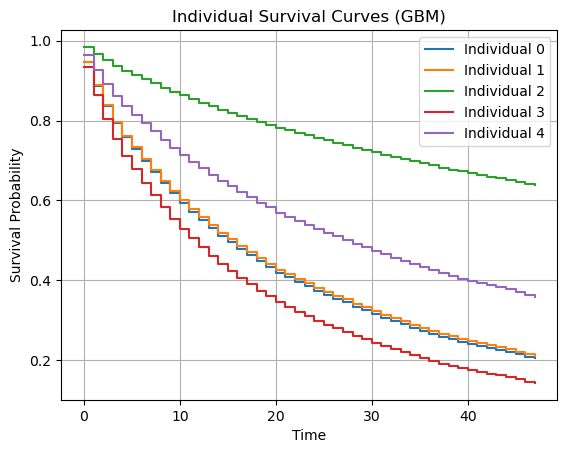

In [47]:
# Predict survival functions for the test set
test_surv_curves = gbm.predict_survival_function(x_test_df)

# Calculate mean survival time for each individual
def mean_survival_time_gbm(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_gbm = mean_survival_time_gbm(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_gbm, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_gbm = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_gbm[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_gbm = mean_squared_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Mean)'])
rmse_mean_gbm = np.sqrt(mse_mean_gbm)
print("Root Mean Squared Error (RMSE) with GBM Mean Prediction:", rmse_mean_gbm)

# Calculate RRMSE
mean_observed = np.mean(results_gbm['Survival months'])
rrmse_mean = rmse_mean_gbm / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Calculate C-index
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
c_index = gbm.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (GBM)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
# Initialize and train the Gradient Boosting Survival Analysis model
gbm = GradientBoostingSurvivalAnalysis(learning_rate=0.01, n_estimators=100, min_samples_split=5, min_samples_leaf=5, random_state=42)
gbm.fit(x_train_df, y_train_structured)

CPU times: total: 11min 34s
Wall time: 11min 34s


GradientBoostingSurvivalAnalysis(learning_rate=0.01, min_samples_leaf=5,
                                 min_samples_split=5, random_state=42)

       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       19.926799
1                    2             1                       22.412441
2                   31             1                       29.417077
3                    6             0                       19.926799
4                    4             1                       19.497526
...                ...           ...                             ...
10433               12             1                       23.187199
10434               28             1                       23.577268
10435               41             0                       13.887999
10436               10             1                       19.926799
10437                1             1                       13.887999

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with GBM Mean Prediction: 14.171792501895903
Root Relative Mean Squared Error (RRMSE) with Mean Prediction: 0.69964

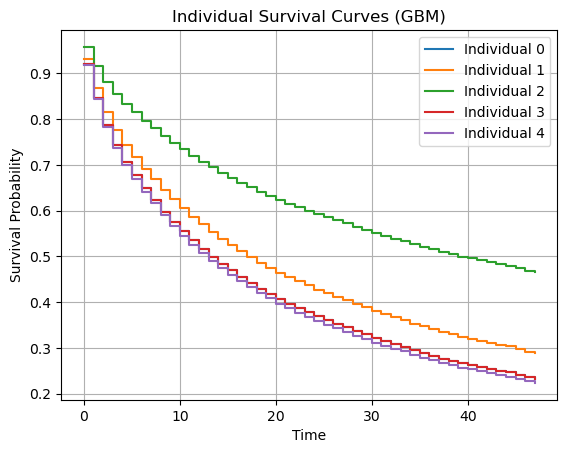

In [45]:
# Predict survival functions for the test set
test_surv_curves = gbm.predict_survival_function(x_test_df)

# Calculate mean survival time for each individual
def mean_survival_time_gbm(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_gbm = mean_survival_time_gbm(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_gbm, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_gbm = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_gbm[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_gbm = mean_squared_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Mean)'])
rmse_mean_gbm = np.sqrt(mse_mean_gbm)
print("Root Mean Squared Error (RMSE) with GBM Mean Prediction:", rmse_mean_gbm)

# Calculate RRMSE
mean_observed = np.mean(results_gbm['Survival months'])
rrmse_mean = rmse_mean_gbm / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Calculate C-index
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
c_index = gbm.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (GBM)')
plt.legend()
plt.grid(True)
plt.show()

#### Median

       Survival months  Vital status  Predicted Survival Time (Median)
0                   19             1                              12.0
1                    2             1                              17.0
2                   31             1                              47.0
3                    6             0                              12.0
4                    4             1                              23.0
...                ...           ...                               ...
10433               12             1                              13.0
10434               28             1                              24.0
10435               41             0                               2.0
10436               10             1                              14.0
10437                1             1                               3.0

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Median Prediction: 14.602588179121827
Root Relative Mean Squared Error (RRMSE) with Me

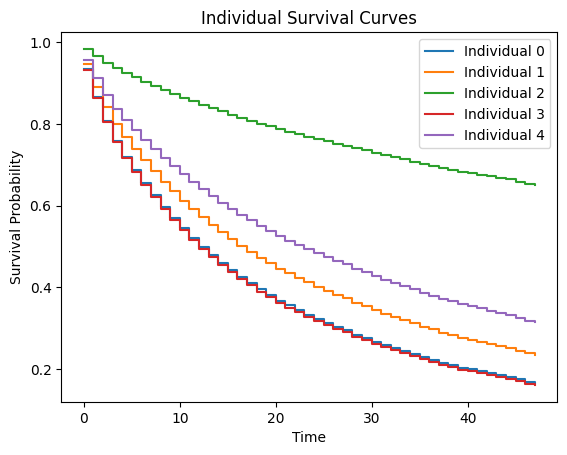

CPU times: total: 1 s
Wall time: 1.9 s


In [74]:
%%time
# Predict survival functions for the test set
test_surv_curves = gbm.predict_survival_function(test_data_new.drop(['Vital status', 'Survival months'], axis=1), return_array=False)

# Define a function to calculate the median survival time from the survival function
def median_survival_time(surv_funcs):
    median_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        if any(survival_probs <= 0.5):
            median_time = times[survival_probs <= 0.5][0]
        else:
            median_time = times[-1]  # If never reaches 0.5, return the maximum time value
        median_times.append(median_time)
    return np.array(median_times)

predicted_medians_gbm = median_survival_time(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_medians_df = pd.DataFrame(predicted_medians_gbm, columns=['Predicted Survival Time (Median)'])

# Merge the prediction results with the actual test data
results_gbm = pd.concat([test_data_new.reset_index(drop=True), predicted_medians_df.reset_index(drop=True)], axis=1)
print(results_gbm[['Survival months', 'Vital status', 'Predicted Survival Time (Median)']])

# Calculate RMSE for Median Predictions
mse_median_gbm = mean_squared_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Median)'])
rmse_median_gbm = np.sqrt(mse_median_gbm)
print("Root Mean Squared Error (RMSE) with Median Prediction:", rmse_median_gbm)

# Calculate RRMSE
mean_observed = np.mean(results_gbm['Survival months'])
rrmse_median = rmse_median_gbm / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Median Prediction:", rrmse_median)

# Calculate MAE for Mean Predictions
mae_median = mean_absolute_error(results_gbm['Survival months'], results_gbm['Predicted Survival Time (Median)'])
print("Mean Absolute Error (MAE) with Median Prediction:", mae_median)

# Calculate C-index
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
c_index = gbm.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.show()

#### Hyperparameter tuning

In [38]:
%%time

# Define the parameter grid for GradientBoostingSurvivalAnalysis
param_grid = {
    'learning_rate': [0.05, 0.08, 0.1],
    'n_estimators': [20, 50, 80],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [2, 3, 5]
}

# Initialize GradientBoostingSurvivalAnalysis
gbsa = GradientBoostingSurvivalAnalysis(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbsa, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(train_data_new.drop(['Vital status', 'Survival months'], axis=1), y_train_structured)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Extract the best parameters
best_params = grid_search.best_params_


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'learning_rate': 0.05, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}
CPU times: total: 2min 19s
Wall time: 1h 38min 37s


       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       19.877074
1                    2             1                       22.469686
2                   31             1                       29.419001
3                    6             0                       19.877074
4                    4             1                       19.514044
...                ...           ...                             ...
10433               12             1                       23.076213
10434               28             1                       23.319365
10435               41             0                       13.861601
10436               10             1                       19.877074
10437                1             1                       13.861601

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Optimized Gradient Boosting Survival Analysis Mean Prediction: 14.157661572308642
Root Relative Mean Squared E

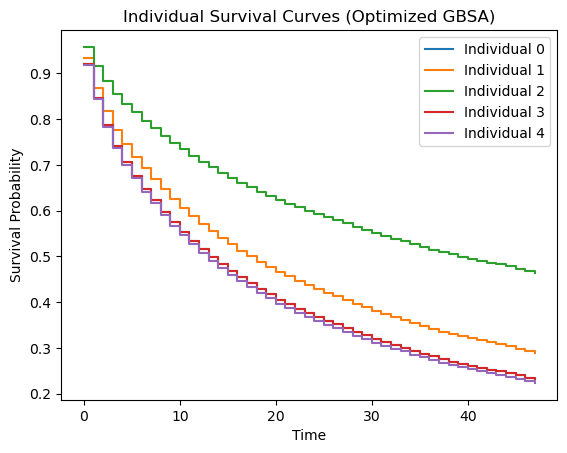

In [39]:
# Initialize the GradientBoostingSurvivalAnalysis with the best parameters
gbsa_best = GradientBoostingSurvivalAnalysis(learning_rate=best_params['learning_rate'],
                                             n_estimators=best_params['n_estimators'],
                                             min_samples_split=best_params['min_samples_split'],
                                             min_samples_leaf=best_params['min_samples_leaf'],
                                             random_state=42)

# Train the final model
gbsa_best.fit(train_data_new.drop(['Vital status', 'Survival months'], axis=1), y_train_structured)

# Predict survival functions for the test set
test_surv_curves_best = gbsa_best.predict_survival_function(test_data_new.drop(['Vital status', 'Survival months'], axis=1), return_array=False)

# Calculate mean survival time for each individual
def mean_survival_time_gbsa(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_gbsa_best = mean_survival_time_gbsa(test_surv_curves_best)

# Convert the predictions to a DataFrame for further processing
predicted_means_df_best = pd.DataFrame(predicted_means_gbsa_best, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_gbsa_best = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df_best.reset_index(drop=True)], axis=1)
print(results_gbsa_best[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_gbsa_best = mean_squared_error(results_gbsa_best['Survival months'], results_gbsa_best['Predicted Survival Time (Mean)'])
rmse_mean_gbsa_best = np.sqrt(mse_mean_gbsa_best)
print("Root Mean Squared Error (RMSE) with Optimized Gradient Boosting Survival Analysis Mean Prediction:", rmse_mean_gbsa_best)

# Calculate RRMSE
mean_observed = np.mean(results_gbsa_best['Survival months'])
rrmse_mean = rmse_mean_gbsa_best / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_gbsa_best['Survival months'], results_gbsa_best['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Calculate C-index
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
c_index = gbsa_best.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves_best))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves_best[i].x, test_surv_curves_best[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (Optimized GBSA)')
plt.legend()
plt.show()

### 4. SurvivalTree

#### Mean

In [61]:
%%time
from sksurv.tree import SurvivalTree

# Prepare feature matrices
X_train = train_data_new.drop(['Vital status', 'Survival months'], axis=1)
X_test = test_data_new.drop(['Vital status', 'Survival months'], axis=1)

# Initialize and train the SurvivalTree model
tree = SurvivalTree(random_state=42)
tree.fit(X_train, y_train_structured)


CPU times: total: 1.23 s
Wall time: 3.18 s


SurvivalTree(random_state=42)

SurvivalTree Results:
        Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       47.000000
1                    2             1                       38.750000
2                   31             1                       47.000000
3                    6             0                       37.600000
4                    4             1                       26.700000
...                ...           ...                             ...
10433               12             1                       34.900000
10434               28             1                       16.500000
10435               41             0                        0.166667
10436               10             1                       19.833333
10437                1             1                        0.750000

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with SurvivalTree Mean Prediction: 16.95649098529911
Root Relative Mean Squared Error (RRMSE

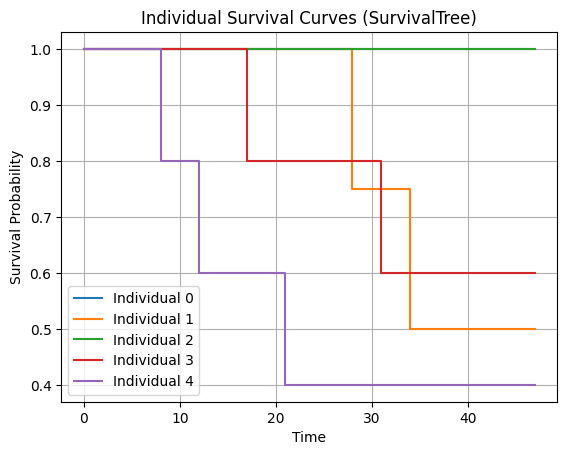

In [75]:
# Predict survival functions for the test set
test_surv_curves = tree.predict_survival_function(X_test)

# Function to calculate mean survival time
def mean_survival_time(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

# Calculate mean survival time for SurvivalTree
predicted_means_tree = mean_survival_time(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df_tree = pd.DataFrame(predicted_means_tree, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_tree = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df_tree.reset_index(drop=True)], axis=1)

# Print results
print("SurvivalTree Results:\n", results_tree[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_tree = mean_squared_error(results_tree['Survival months'], results_tree['Predicted Survival Time (Mean)'])
rmse_mean_tree = np.sqrt(mse_mean_tree)
print("Root Mean Squared Error (RMSE) with SurvivalTree Mean Prediction:", rmse_mean_tree)

# Calculate RRMSE
mean_observed = np.mean(results_tree['Survival months'])
rrmse_mean = rmse_mean_tree / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_tree['Survival months'], results_tree['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Calculate C-index
c_index = tree.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)


# Visualize the survival curves for the first 5 individuals
for i in range(min(5, len(test_surv_curves))):
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (SurvivalTree)')
plt.legend()
plt.grid(True)
plt.show()

#### Median

       Survival months  Vital status  Predicted Survival Time (Median)
0                   19             1                              47.0
1                    2             1                              34.0
2                   31             1                              47.0
3                    6             0                              47.0
4                    4             1                              21.0
...                ...           ...                               ...
10433               12             1                              34.0
10434               28             1                               8.0
10435               41             0                               0.0
10436               10             1                              20.0
10437                1             1                               0.0

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Median Prediction: 18.25396722386256
Root Relative Mean Squared Error (RRMSE) with Med

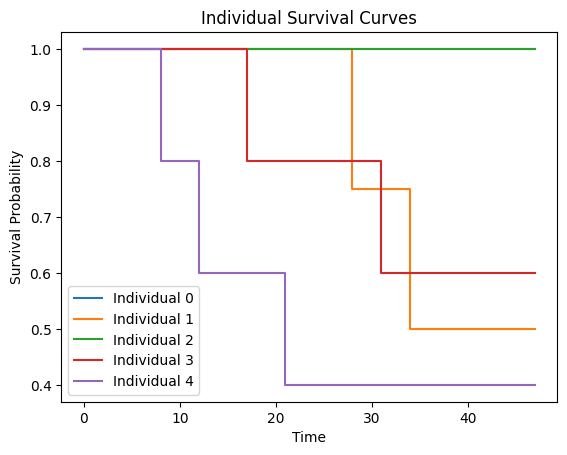

CPU times: total: 2.59 s
Wall time: 4.45 s


In [76]:
%%time
from sksurv.tree import SurvivalTree
# Prepare feature matrices
X_train = train_data_new.drop(['Vital status', 'Survival months'], axis=1)
X_test = test_data_new.drop(['Vital status', 'Survival months'], axis=1)

# Initialize and train the SurvivalTree model
tree = SurvivalTree(random_state=42)
tree.fit(X_train, y_train_structured)

# Predict survival functions for the test set
test_surv_curves = tree.predict_survival_function(X_test)

# Define a function to calculate the median survival time from the survival function
def median_survival_time(surv_funcs):
    median_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        if any(survival_probs <= 0.5):
            median_time = times[survival_probs <= 0.5][0]
        else:
            median_time = times[-1]  # If never reaches 0.5, return the maximum time value
        median_times.append(median_time)
    return np.array(median_times)

predicted_medians_tree = median_survival_time(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_medians_df = pd.DataFrame(predicted_medians_tree, columns=['Predicted Survival Time (Median)'])

# Merge the prediction results with the actual test data
results_tree = pd.concat([test_data_new.reset_index(drop=True), predicted_medians_df.reset_index(drop=True)], axis=1)
print(results_tree[['Survival months', 'Vital status', 'Predicted Survival Time (Median)']])

# Calculate RMSE for Median Predictions
mse_median_tree = mean_squared_error(results_tree['Survival months'], results_tree['Predicted Survival Time (Median)'])
rmse_median_tree = np.sqrt(mse_median_tree)
print("Root Mean Squared Error (RMSE) with Median Prediction:", rmse_median_tree)

# Calculate RRMSE
mean_observed = np.mean(results_tree['Survival months'])
rrmse_median = rmse_median_tree / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Median Prediction:", rrmse_median)

# Calculate MAE for Mean Predictions
mae_median = mean_absolute_error(results_tree['Survival months'], results_tree['Predicted Survival Time (Median)'])
print("Mean Absolute Error (MAE) with Median Prediction:", mae_median)

# Calculate C-index
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
c_index = tree.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.show()

#### Hyperparameter tuning

In [64]:
%%time

# Define the parameter grid for SurvivalTree
param_grid_st = {
    'min_samples_split': [5, 10, 15],  # Adjust the minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 10, 15],  # Adjust the minimum number of samples required to be at a leaf node
    'max_features': [0.1, 0.5, 0.9],
    'max_depth': [5, 10, 15]
}

# Initialize SurvivalTree
st = SurvivalTree(random_state=42)

# Initialize GridSearchCV
grid_search_st = GridSearchCV(estimator=st, param_grid=param_grid_st, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search_st.fit(train_data_new.drop(['Vital status', 'Survival months'], axis=1), y_train_structured)

# Print the best parameters
print("Best Parameters:", grid_search_st.best_params_)

# Extract the best parameters
best_params_st = grid_search_st.best_params_

c:\Users\小敏\.conda\envs\PY37\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'max_depth': 5, 'max_features': 0.1, 'min_samples_leaf': 5, 'min_samples_split': 5}
CPU times: total: 5.42 s
Wall time: 2min 23s


       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       23.278372
1                    2             1                       24.192594
2                   31             1                       41.507158
3                    6             0                       19.214259
4                    4             1                       14.772510
...                ...           ...                             ...
10433               12             1                       17.288499
10434               28             1                       33.598274
10435               41             0                        6.146255
10436               10             1                       19.214259
10437                1             1                        6.146255

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Optimized SurvivalTree Mean Prediction: 13.278206857319141
Root Relative Mean Squared Error (RRMSE) with Optim

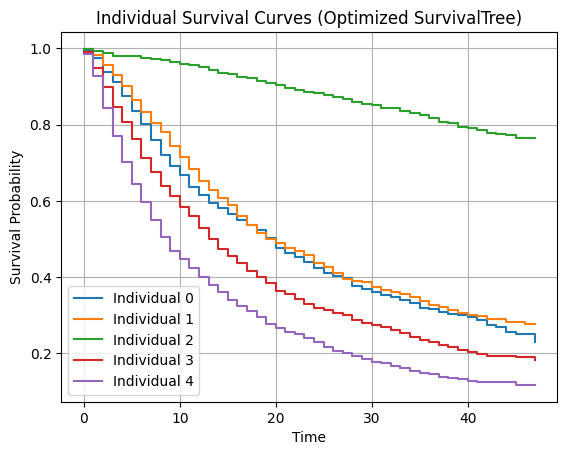

In [65]:
# Initialize the SurvivalTree with the best parameters
st_best = SurvivalTree(min_samples_split=best_params_st['min_samples_split'],
                       min_samples_leaf=best_params_st['min_samples_leaf'],
                       max_depth=best_params_st['max_depth'],
                       random_state=42)

# Train the final model
st_best.fit(train_data_new.drop(['Vital status', 'Survival months'], axis=1), y_train_structured)

# Convert test data
y_test_structured = df_to_structured(test_data_new, 'Vital status', 'Survival months')

# Predict survival functions for the test set
test_surv_curves_best_st = st_best.predict_survival_function(test_data_new.drop(['Vital status', 'Survival months'], axis=1), return_array=False)

# Calculate mean survival time for each individual
def mean_survival_time_st(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_st_best = mean_survival_time_st(test_surv_curves_best_st)

# Convert the predictions to a DataFrame for further processing
predicted_means_df_st_best = pd.DataFrame(predicted_means_st_best, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_st_best = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df_st_best.reset_index(drop=True)], axis=1)
print(results_st_best[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_st_best = mean_squared_error(results_st_best['Survival months'], results_st_best['Predicted Survival Time (Mean)'])
rmse_mean_st_best = np.sqrt(mse_mean_st_best)
print("Root Mean Squared Error (RMSE) with Optimized SurvivalTree Mean Prediction:", rmse_mean_st_best)

# Calculate RRMSE
mean_observed = np.mean(results_st_best['Survival months'])
rrmse_mean = rmse_mean_st_best / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Optimized SurvivalTree Mean Prediction:", rrmse_mean)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_st_best['Survival months'], results_st_best['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Optimized SurvivalTree Mean Prediction:", mae_mean)

# Calculate C-index
c_index = st_best.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves_best_st))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves_best_st[i].x, test_surv_curves_best_st[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves (Optimized SurvivalTree)')
plt.legend()
plt.grid(True)
plt.show()


### 5. Stacking

#### Mean

In [77]:
%%time
from sksurv.meta import Stacking

# Function to convert DataFrame to structured array for scikit-survival
def df_to_structured(df, event_col, time_col):
    return np.array([(e, t) for e, t in zip(df[event_col], df[time_col])], dtype=[('event', bool), ('time', np.float64)])

# Calculate mean survival time from survival functions
def mean_survival_time(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

# Reset indices to ensure consistency
x_train_df = x_train_df.reset_index(drop=True)
x_test_df = x_test_df.reset_index(drop=True)
y_surv_train = y_surv_train.reset_index(drop=True)
y_surv_test = y_surv_test.reset_index(drop=True)
y_vital_train = y_vital_train.reset_index(drop=True)
y_vital_test = y_vital_test.reset_index(drop=True)

# Convert training and testing data
y_train_structured = df_to_structured(train_data_new, 'Vital status', 'Survival months')
y_test_structured = df_to_structured(test_data_new, 'Vital status', 'Survival months')

CPU times: total: 15.6 ms
Wall time: 56 ms


In [78]:
%%time
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.tree import SurvivalTree
from sksurv.meta import Stacking

# Initialize base models
rsf = RandomSurvivalForest(random_state=42)
gbsa = GradientBoostingSurvivalAnalysis(random_state=42)
st = SurvivalTree(random_state=42)

# Initialize meta-model (Cox Proportional Hazards model)
meta_model = CoxPHSurvivalAnalysis()

# Initialize Stacking model
stacking_model = Stacking(
    meta_estimator=meta_model,
    base_estimators=[
        ("rsf", rsf),
        ("gbsa", gbsa),
        ("st", st)
    ],
    probabilities=False  # Set to False if base models do not support predict_proba
)

# Train the stacking model
stacking_model.fit(x_train_df, y_train_structured)

CPU times: total: 10min 5s
Wall time: 16min 44s


Stacking(base_estimators=[('rsf', RandomSurvivalForest(random_state=42)),
                          ('gbsa',
                           GradientBoostingSurvivalAnalysis(random_state=42)),
                          ('st', SurvivalTree(random_state=42))],
         meta_estimator=CoxPHSurvivalAnalysis(), probabilities=False)

       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       38.038925
1                    2             1                       33.649640
2                   31             1                       41.150708
3                    6             0                       28.782748
4                    4             1                       28.635611
...                ...           ...                             ...
10433               12             1                       34.201928
10434               28             1                       24.602778
10435               41             0                        3.512792
10436               10             1                       20.043884
10437                1             1                        2.542660

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Random Survival Forest Mean Prediction: 15.028164045595384
Root Relative Mean Squared Error (RRMSE) with Mean 

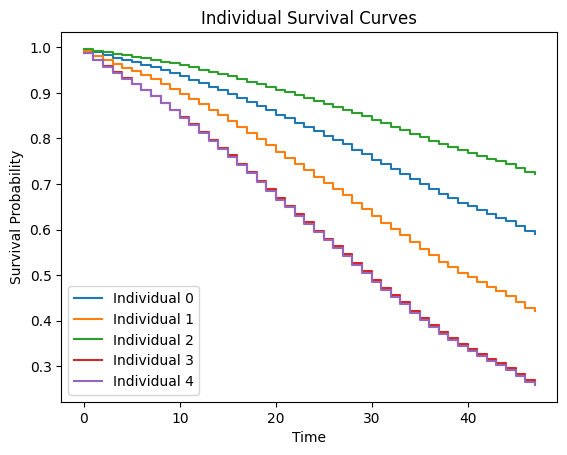

In [79]:
# Predict survival functions for the test set
test_surv_curves = stacking_model.predict_survival_function(x_test_df, return_array=False)

# Calculate mean survival time for each individual
def mean_survival_time_sta(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_sta = mean_survival_time_sta(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_sta, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_sta = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_sta[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_sta = mean_squared_error(results_sta['Survival months'], results_sta['Predicted Survival Time (Mean)'])
rmse_mean_sta = np.sqrt(mse_mean_sta)
print("Root Mean Squared Error (RMSE) with Random Survival Forest Mean Prediction:", rmse_mean_sta)

# Calculate RRMSE
mean_observed = np.mean(results_sta['Survival months'])
rrmse_mean = rmse_mean_sta / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate C-index
c_index = stacking_model.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
print("Concordance Index (C-index) of testing set:", c_index)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_sta['Survival months'], results_sta['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.show()

#### Median

       Survival months  Vital status  Predicted Survival Time (Median)
0                   19             1                              47.0
1                    2             1                              40.0
2                   31             1                              47.0
3                    6             0                              30.0
4                    4             1                              30.0
...                ...           ...                               ...
10433               12             1                              42.0
10434               28             1                              24.0
10435               41             0                               3.0
10436               10             1                              19.0
10437                1             1                               2.0

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Median Prediction: 17.066686713099774
Root Relative Mean Squared Error (RRMSE) with Me

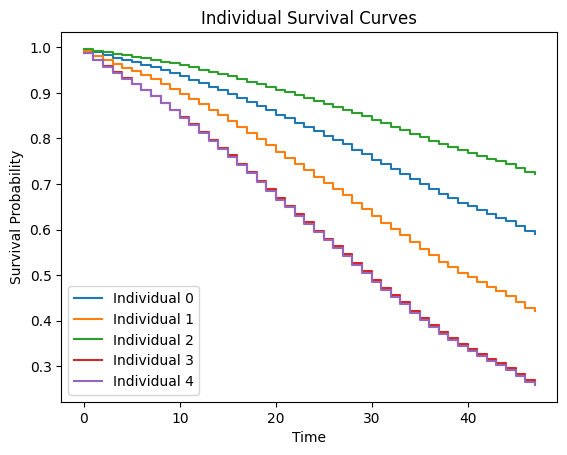

CPU times: total: 2.02 s
Wall time: 4.16 s


In [80]:
%%time

# Predict survival functions for the test set
test_surv_curves = stacking_model.predict_survival_function(x_test_df, return_array=False)

# Define a function to calculate the median survival time from the survival function
def median_survival_time(surv_funcs):
    median_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        if any(survival_probs <= 0.5):
            median_time = times[survival_probs <= 0.5][0]
        else:
            median_time = times[-1]  # If never reaches 0.5, return the maximum time value
        median_times.append(median_time)
    return np.array(median_times)

predicted_medians_sta = median_survival_time(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_medians_df = pd.DataFrame(predicted_medians_sta, columns=['Predicted Survival Time (Median)'])

# Merge the prediction results with the actual test data
results_sta = pd.concat([test_data_new.reset_index(drop=True), predicted_medians_df.reset_index(drop=True)], axis=1)
print(results_sta[['Survival months', 'Vital status', 'Predicted Survival Time (Median)']])

# Calculate RMSE for Median Predictions
mse_median_sta = mean_squared_error(results_sta['Survival months'], results_sta['Predicted Survival Time (Median)'])
rmse_median_sta = np.sqrt(mse_median_sta)
print("Root Mean Squared Error (RMSE) with Median Prediction:", rmse_median_sta)

# Calculate RRMSE
mean_observed = np.mean(results_sta['Survival months'])
rrmse_mean = rmse_median_sta / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Median Prediction:", rrmse_median)

# Calculate MAE for Mean Predictions
mae_median = mean_absolute_error(results_sta['Survival months'], results_sta['Predicted Survival Time (Median)'])
print("Mean Absolute Error (MAE) with Median Prediction:", mae_median)

# Calculate C-index
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
c_index = stacking_model.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
print("Concordance Index (C-index) of testing set:", c_index)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.show()

#### Hyperparameter tuning

In [43]:
%%time
from sksurv.meta import Stacking

# Function to convert DataFrame to structured array for scikit-survival
def df_to_structured(df, event_col, time_col):
    return np.array([(e, t) for e, t in zip(df[event_col], df[time_col])], dtype=[('event', bool), ('time', np.float64)])

# Calculate mean survival time from survival functions
def mean_survival_time(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

# Reset indices to ensure consistency
x_train_df = x_train_df.reset_index(drop=True)
x_test_df = x_test_df.reset_index(drop=True)
y_surv_train = y_surv_train.reset_index(drop=True)
y_surv_test = y_surv_test.reset_index(drop=True)
y_vital_train = y_vital_train.reset_index(drop=True)
y_vital_test = y_vital_test.reset_index(drop=True)

# Convert training and testing data
y_train_structured = df_to_structured(train_data_new, 'Vital status', 'Survival months')
y_test_structured = df_to_structured(test_data_new, 'Vital status', 'Survival months')

from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.tree import SurvivalTree
from sksurv.meta import Stacking

# Initialize base models
rsf = RandomSurvivalForest(min_samples_leaf=5, min_samples_split=10, n_estimators=50, random_state=42)
gbsa = GradientBoostingSurvivalAnalysis(random_state=42)
st = SurvivalTree(max_depth=5, max_features=0.1, min_samples_leaf=5, min_samples_split=5, random_state=42)

# Initialize meta-model (Cox Proportional Hazards model)
meta_model = CoxPHSurvivalAnalysis(alpha=1250)
# Initialize Stacking model
stacking_model = Stacking(
    meta_estimator=meta_model,
    base_estimators=[
        ("rsf", rsf),
        ("gbsa", gbsa),
        ("st", st)
    ],
    probabilities=False  # Set to False if base models do not support predict_proba
)

# Train the stacking model
stacking_model.fit(x_train_df, y_train_structured)

CPU times: total: 10min 27s
Wall time: 16min 7s


Stacking(base_estimators=[('rsf',
                           RandomSurvivalForest(min_samples_leaf=5,
                                                min_samples_split=10,
                                                n_estimators=50,
                                                random_state=42)),
                          ('gbsa',
                           GradientBoostingSurvivalAnalysis(random_state=42)),
                          ('st',
                           SurvivalTree(max_depth=5, max_features=0.1,
                                        min_samples_leaf=5, min_samples_split=5,
                                        random_state=42))],
         meta_estimator=CoxPHSurvivalAnalysis(alpha=1250), probabilities=False)

       Survival months  Vital status  Predicted Survival Time (Mean)
0                   19             1                       22.074017
1                    2             1                       24.565485
2                   31             1                       36.823654
3                    6             0                       15.950588
4                    4             1                       23.539036
...                ...           ...                             ...
10433               12             1                       20.669460
10434               28             1                       32.649348
10435               41             0                        5.133750
10436               10             1                       23.894694
10437                1             1                        3.490386

[10438 rows x 3 columns]
Root Mean Squared Error (RMSE) with Random Survival Forest Mean Prediction: 13.278592606678766
Root Relative Mean Squared Error (RRMSE) with Mean 

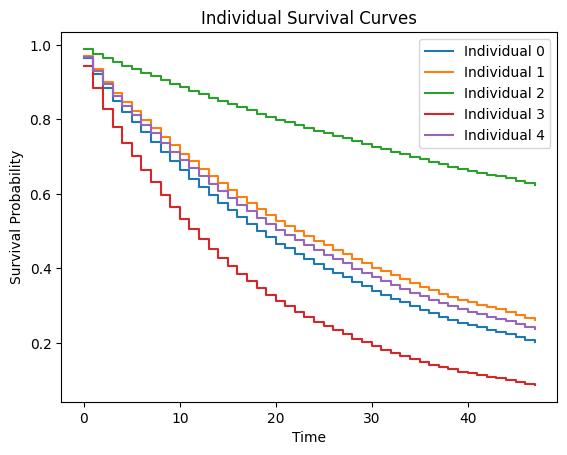

In [44]:
# Predict survival functions for the test set
test_surv_curves = stacking_model.predict_survival_function(x_test_df, return_array=False)

# Calculate mean survival time for each individual
def mean_survival_time_sta(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_sta = mean_survival_time_sta(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_sta, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_sta_best = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_sta_best[['Survival months', 'Vital status', 'Predicted Survival Time (Mean)']])

# Calculate RMSE for Mean Predictions
mse_mean_sta = mean_squared_error(results_sta_best['Survival months'], results_sta_best['Predicted Survival Time (Mean)'])
rmse_mean_sta = np.sqrt(mse_mean_sta)
print("Root Mean Squared Error (RMSE) with Random Survival Forest Mean Prediction:", rmse_mean_sta)

# Calculate RRMSE
mean_observed = np.mean(results_sta_best['Survival months'])
rrmse_mean = rmse_mean_sta / mean_observed
print("Root Relative Mean Squared Error (RRMSE) with Mean Prediction:", rrmse_mean)

# Calculate C-index
c_index = stacking_model.score(test_data_new.drop(['Vital status', 'Survival months'], axis=1), y_test_structured)
#c_index = concordance_index(test_data_new['Survival months'], predicted_score, test_data_new['Vital status'])
print("Concordance Index (C-index) of testing set:", c_index)

# Calculate MAE for Mean Predictions
mae_mean = mean_absolute_error(results_sta_best['Survival months'], results_sta_best['Predicted Survival Time (Mean)'])
print("Mean Absolute Error (MAE) with Mean Prediction:", mae_mean)

# Visualize the survival curves
for i in range(min(5, len(test_surv_curves))):  # Plot survival curves for the first 5 individuals
    plt.step(test_surv_curves[i].x, test_surv_curves[i].y, where="post", label=f'Individual {i}')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Individual Survival Curves')
plt.legend()
plt.show()

### Prediction consistency

In [223]:
results = pd.concat([test_data_new.reset_index(drop=True), predicted_means.reset_index(drop=True)], axis=1)
print(results)

            Age  Median household income  Grade  Combined Summary Stage  \
0      1.305853                        4      1                       2   
1      0.006946                        1      0                       1   
2     -0.492634                        4      2                       1   
3     -0.892298                        8      1                       2   
4     -1.791541                        9      1                       2   
...         ...                      ...    ...                     ...   
10433  1.505685                        5      1                       0   
10434  0.906189                        6      1                       0   
10435  0.606441                        9      2                       2   
10436  0.306694                        4      1                       2   
10437  0.006946                        4      1                       2   

       Stage Group  Tumor Size  Sex_Female  Sex_Male  \
0                3   -1.214593         0.0 

In [224]:
results_rsf_best = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df_best.reset_index(drop=True)], axis=1)
print(results_rsf_best)

            Age  Median household income  Grade  Combined Summary Stage  \
0      1.305853                        4      1                       2   
1      0.006946                        1      0                       1   
2     -0.492634                        4      2                       1   
3     -0.892298                        8      1                       2   
4     -1.791541                        9      1                       2   
...         ...                      ...    ...                     ...   
10433  1.505685                        5      1                       0   
10434  0.906189                        6      1                       0   
10435  0.606441                        9      2                       2   
10436  0.306694                        4      1                       2   
10437  0.006946                        4      1                       2   

       Stage Group  Tumor Size  Sex_Female  Sex_Male  \
0                3   -1.214593         0.0 

In [225]:
# Predict survival functions for the test set
test_surv_curves = gbm.predict_survival_function(x_test_df)

# Calculate mean survival time for each individual
def mean_survival_time_gbm(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_gbm = mean_survival_time_gbm(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_gbm, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_gbm = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_gbm)

            Age  Median household income  Grade  Combined Summary Stage  \
0      1.305853                        4      1                       2   
1      0.006946                        1      0                       1   
2     -0.492634                        4      2                       1   
3     -0.892298                        8      1                       2   
4     -1.791541                        9      1                       2   
...         ...                      ...    ...                     ...   
10433  1.505685                        5      1                       0   
10434  0.906189                        6      1                       0   
10435  0.606441                        9      2                       2   
10436  0.306694                        4      1                       2   
10437  0.006946                        4      1                       2   

       Stage Group  Tumor Size  Sex_Female  Sex_Male  \
0                3   -1.214593         0.0 

In [226]:
results_st_best = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df_st_best.reset_index(drop=True)], axis=1)
print(results_st_best)

            Age  Median household income  Grade  Combined Summary Stage  \
0      1.305853                        4      1                       2   
1      0.006946                        1      0                       1   
2     -0.492634                        4      2                       1   
3     -0.892298                        8      1                       2   
4     -1.791541                        9      1                       2   
...         ...                      ...    ...                     ...   
10433  1.505685                        5      1                       0   
10434  0.906189                        6      1                       0   
10435  0.606441                        9      2                       2   
10436  0.306694                        4      1                       2   
10437  0.006946                        4      1                       2   

       Stage Group  Tumor Size  Sex_Female  Sex_Male  \
0                3   -1.214593         0.0 

In [229]:
# Predict survival functions for the test set
test_surv_curves = stacking_model.predict_survival_function(x_test_df, return_array=False)

# Calculate mean survival time for each individual
def mean_survival_time_sta(surv_funcs):
    mean_times = []
    for surv_func in surv_funcs:
        times = surv_func.x
        survival_probs = surv_func.y
        mean_time = np.trapz(survival_probs, times)
        mean_times.append(mean_time)
    return np.array(mean_times)

predicted_means_sta = mean_survival_time_sta(test_surv_curves)

# Convert the predictions to a DataFrame for further processing
predicted_means_df = pd.DataFrame(predicted_means_sta, columns=['Predicted Survival Time (Mean)'])

# Merge the prediction results with the actual test data
results_sta_best = pd.concat([test_data_new.reset_index(drop=True), predicted_means_df.reset_index(drop=True)], axis=1)
print(results_sta_best)

            Age  Median household income  Grade  Combined Summary Stage  \
0      1.305853                        4      1                       2   
1      0.006946                        1      0                       1   
2     -0.492634                        4      2                       1   
3     -0.892298                        8      1                       2   
4     -1.791541                        9      1                       2   
...         ...                      ...    ...                     ...   
10433  1.505685                        5      1                       0   
10434  0.906189                        6      1                       0   
10435  0.606441                        9      2                       2   
10436  0.306694                        4      1                       2   
10437  0.006946                        4      1                       2   

       Stage Group  Tumor Size  Sex_Female  Sex_Male  \
0                3   -1.214593         0.0 

#### All testing set

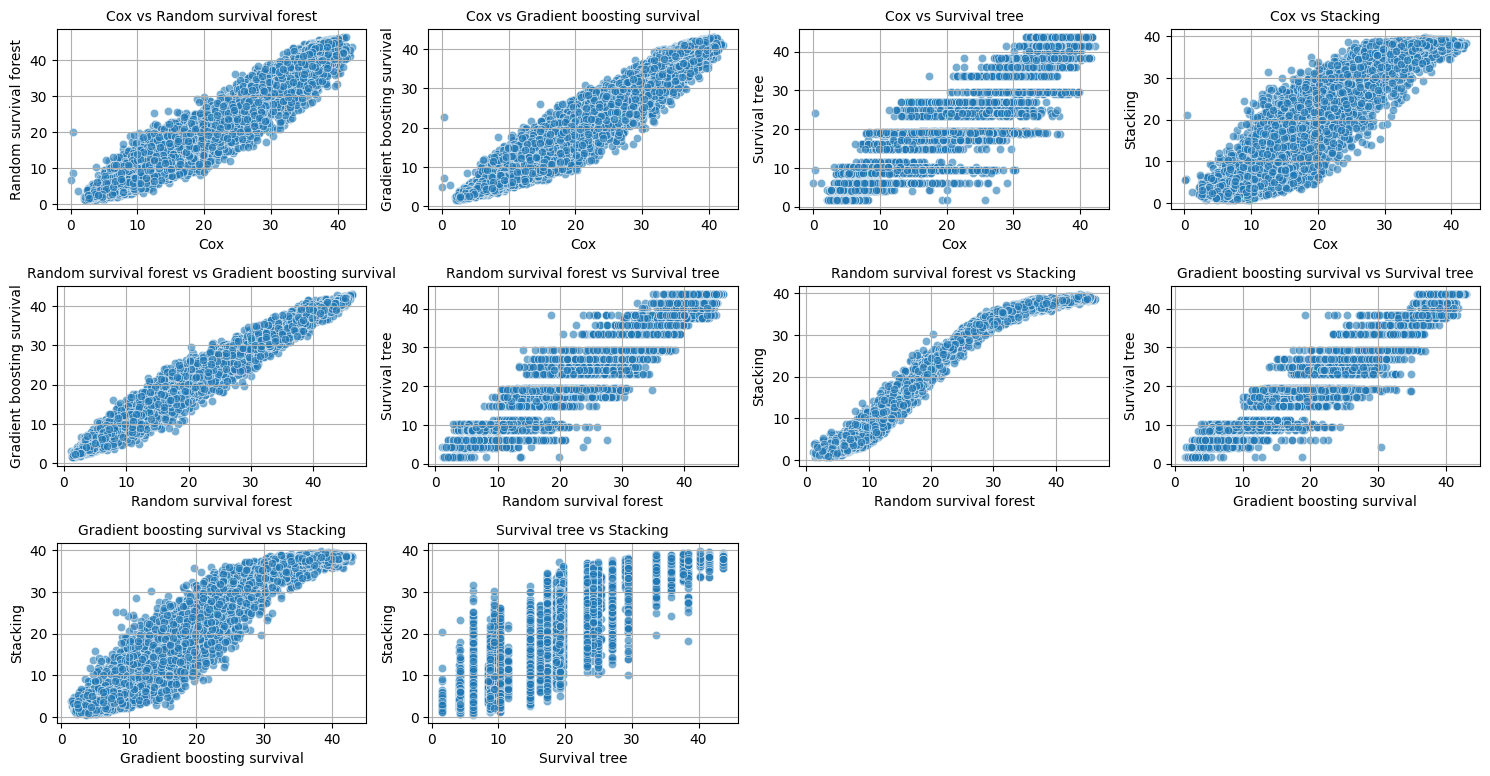

In [69]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'],
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'],
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'],
    'Stacking': results_sta_best['Predicted Survival Time (Mean)']
})

# Generate scatter plots for pairwise comparisons
methods = df_combined.columns
num_methods = len(methods)

plt.figure(figsize=(15, 10))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]
        
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        plt.scatter(df_combined[method1], df_combined[method2], alpha=0.6, edgecolors='w', linewidth=0.5)
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        plot_index += 1

plt.tight_layout()
plt.show()

#### Surgery

In [259]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'], 
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'], 
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'], 
    'Stacking': results_sta_best['Predicted Survival Time (Mean)'],
    'Surgery': results['Surgery_Yes']
})


In [260]:
df_combined

Cox  Random survival forest  Gradient boosting survival  \
0      15.569164               20.130670                   18.204676   
1      22.890884               22.359099                   21.472229   
2      30.832365               37.264445                   36.675775   
3      14.951649               16.988246                   17.979337   
4      24.585819               21.825695                   24.861167   
...          ...                     ...                         ...   
10433  21.943356               19.371331                   18.283831   
10434  30.353859               27.735714                   25.327043   
10435   7.560636                6.978365                    4.499819   
10436  18.577583               20.964374                   19.360783   
10437  10.467992                6.067790                    6.215095   

       Survival tree   Stacking  Surgery  
0          23.278372  22.074017      0.0  
1          24.192594  24.565485      0.0  
2          41.507158  36.823654      1.0  
3          19.214259  15.950588      0.0  
4          14.772510  23.539036      0.0  
...              ...        ...      ...  
10433      17.288499  20.669460      0.0  
10434      33.598274  32.649348      0.0  
10435       6.146255   5.133750      0.0  
10436      19.214259  23.894694      0.0  
10437       6.146255   3.490386      0.0  

[10438 rows x 6 columns]

In [261]:
# Filter data to ensure Surgery labels match correctly
surgery_0 = df_combined[df_combined['Surgery'] == 0]
surgery_1 = df_combined[df_combined['Surgery'] == 1]

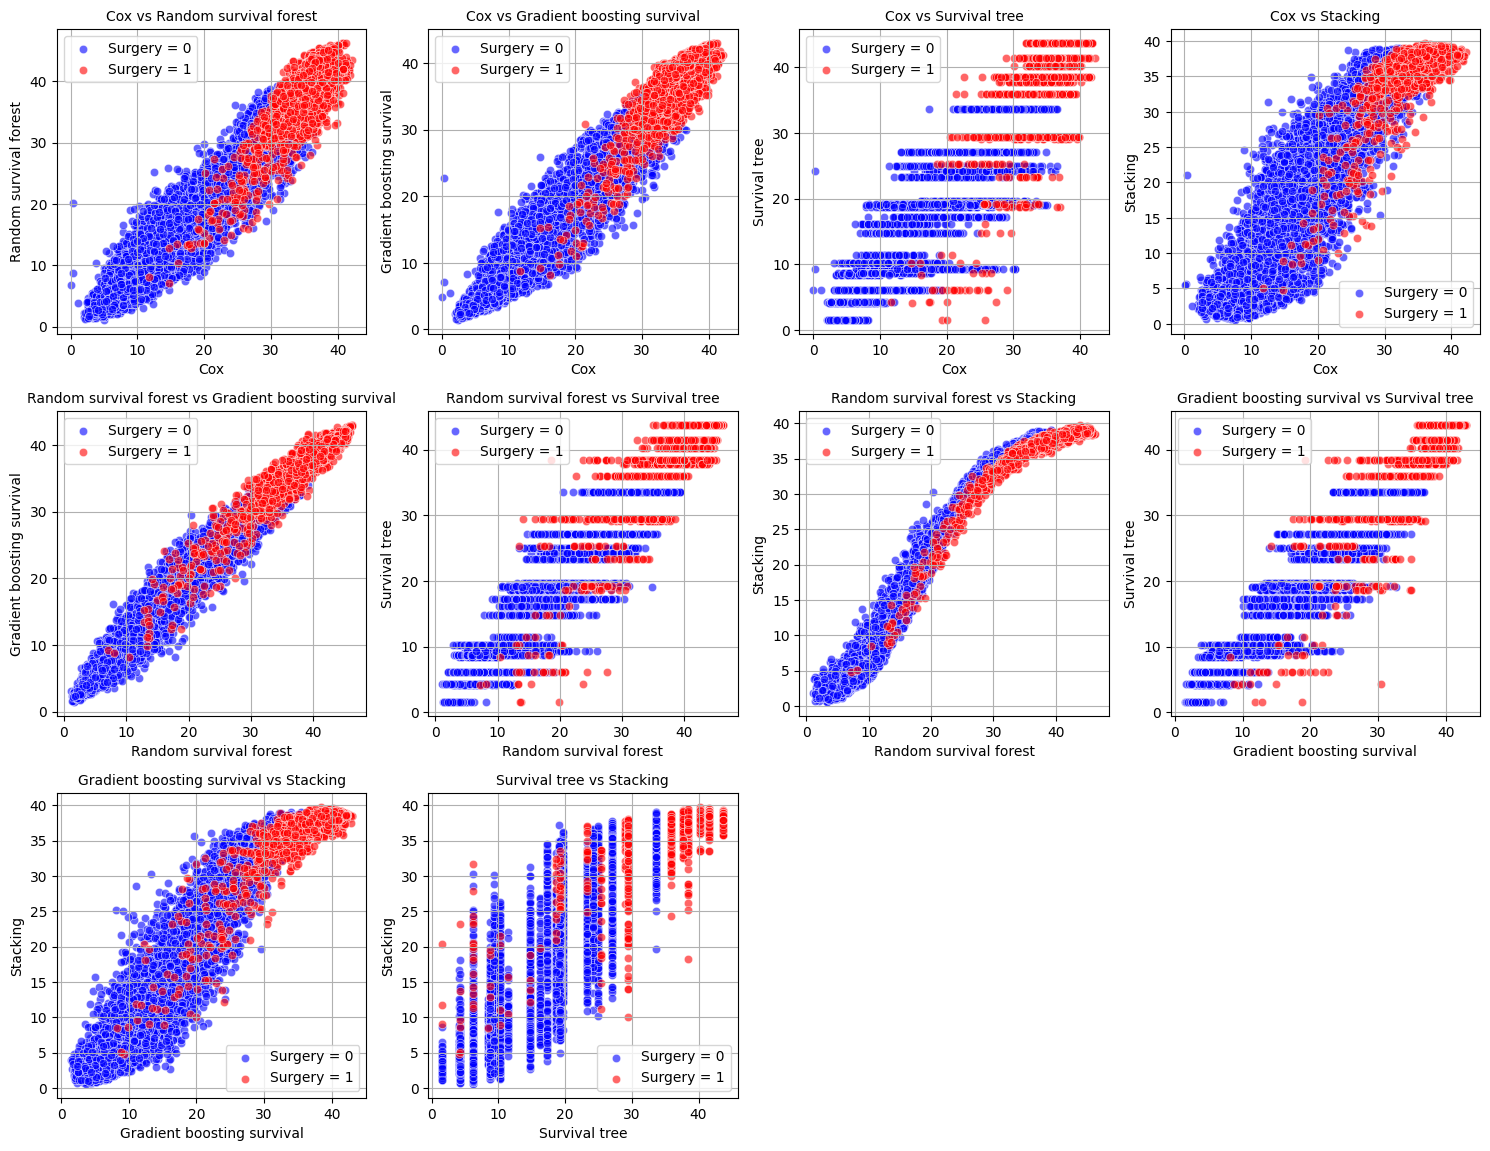

In [262]:
methods = df_combined.columns[:-1]  # remove the last column 'Surgery'
num_methods = len(methods)

plt.figure(figsize=(15, 15))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]

        # Create subplots
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        
        # Plot for Surgery = 0
        plt.scatter(surgery_0[method1], surgery_0[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='blue', label='Surgery = 0')
        
        # Plot for Surgery = 1
        plt.scatter(surgery_1[method1], surgery_1[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='red', label='Surgery = 1')
        
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        if plot_index:
            plt.legend()

        plot_index += 1

plt.tight_layout()
plt.show()

#### Radiation

In [263]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'], 
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'], 
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'], 
    'Stacking': results_sta_best['Predicted Survival Time (Mean)'],
    'Radiation': results['Radiation_Yes']
})

In [264]:
df_combined

Cox  Random survival forest  Gradient boosting survival  \
0      15.569164               20.130670                   18.204676   
1      22.890884               22.359099                   21.472229   
2      30.832365               37.264445                   36.675775   
3      14.951649               16.988246                   17.979337   
4      24.585819               21.825695                   24.861167   
...          ...                     ...                         ...   
10433  21.943356               19.371331                   18.283831   
10434  30.353859               27.735714                   25.327043   
10435   7.560636                6.978365                    4.499819   
10436  18.577583               20.964374                   19.360783   
10437  10.467992                6.067790                    6.215095   

       Survival tree   Stacking  Radiation  
0          23.278372  22.074017        0.0  
1          24.192594  24.565485        1.0  
2          41.507158  36.823654        0.0  
3          19.214259  15.950588        0.0  
4          14.772510  23.539036        1.0  
...              ...        ...        ...  
10433      17.288499  20.669460        1.0  
10434      33.598274  32.649348        1.0  
10435       6.146255   5.133750        0.0  
10436      19.214259  23.894694        0.0  
10437       6.146255   3.490386        0.0  

[10438 rows x 6 columns]

In [265]:
radiation_0 = df_combined[df_combined['Radiation'] == 0]
radiation_1 = df_combined[df_combined['Radiation'] == 1]

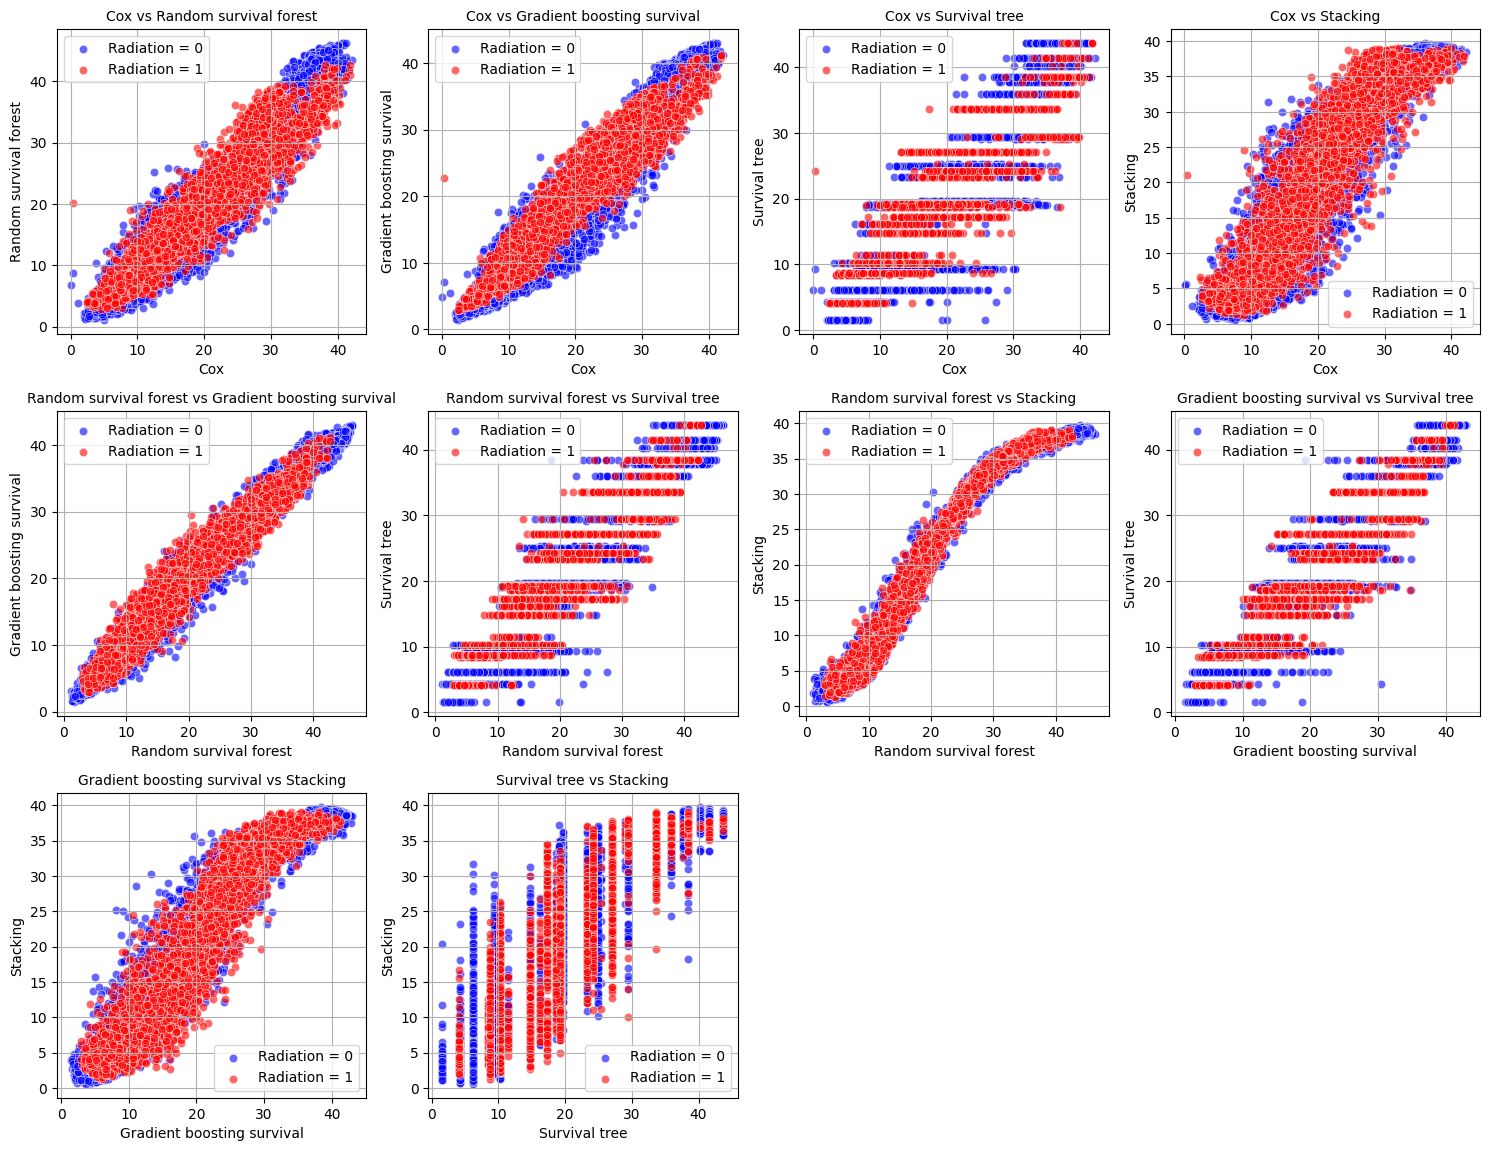

In [266]:
methods = df_combined.columns[:-1]  # remove the last column 'Surgery'
num_methods = len(methods)

plt.figure(figsize=(15, 15))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]

        # Create subplots
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        
        # Plot for radiation = 0
        plt.scatter(radiation_0[method1], radiation_0[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='blue', label='Radiation = 0')
        
        # Plot for radiation = 1
        plt.scatter(radiation_1[method1], radiation_1[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='red', label='Radiation = 1')
        
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        if plot_index:
            plt.legend()

        plot_index += 1

plt.tight_layout()
plt.show()

#### Chemotherapy

In [267]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'], 
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'], 
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'], 
    'Stacking': results_sta_best['Predicted Survival Time (Mean)'],
    'Chemotherapy': results['Chemotherapy_Yes']
})

In [268]:
df_combined

Cox  Random survival forest  Gradient boosting survival  \
0      15.569164               20.130670                   18.204676   
1      22.890884               22.359099                   21.472229   
2      30.832365               37.264445                   36.675775   
3      14.951649               16.988246                   17.979337   
4      24.585819               21.825695                   24.861167   
...          ...                     ...                         ...   
10433  21.943356               19.371331                   18.283831   
10434  30.353859               27.735714                   25.327043   
10435   7.560636                6.978365                    4.499819   
10436  18.577583               20.964374                   19.360783   
10437  10.467992                6.067790                    6.215095   

       Survival tree   Stacking  Chemotherapy  
0          23.278372  22.074017           1.0  
1          24.192594  24.565485           1.0  
2          41.507158  36.823654           0.0  
3          19.214259  15.950588           1.0  
4          14.772510  23.539036           1.0  
...              ...        ...           ...  
10433      17.288499  20.669460           0.0  
10434      33.598274  32.649348           1.0  
10435       6.146255   5.133750           0.0  
10436      19.214259  23.894694           1.0  
10437       6.146255   3.490386           0.0  

[10438 rows x 6 columns]

In [269]:
chemotherapy_0 = df_combined[df_combined['Chemotherapy'] == 0]
chemotherapy_1 = df_combined[df_combined['Chemotherapy'] == 1]

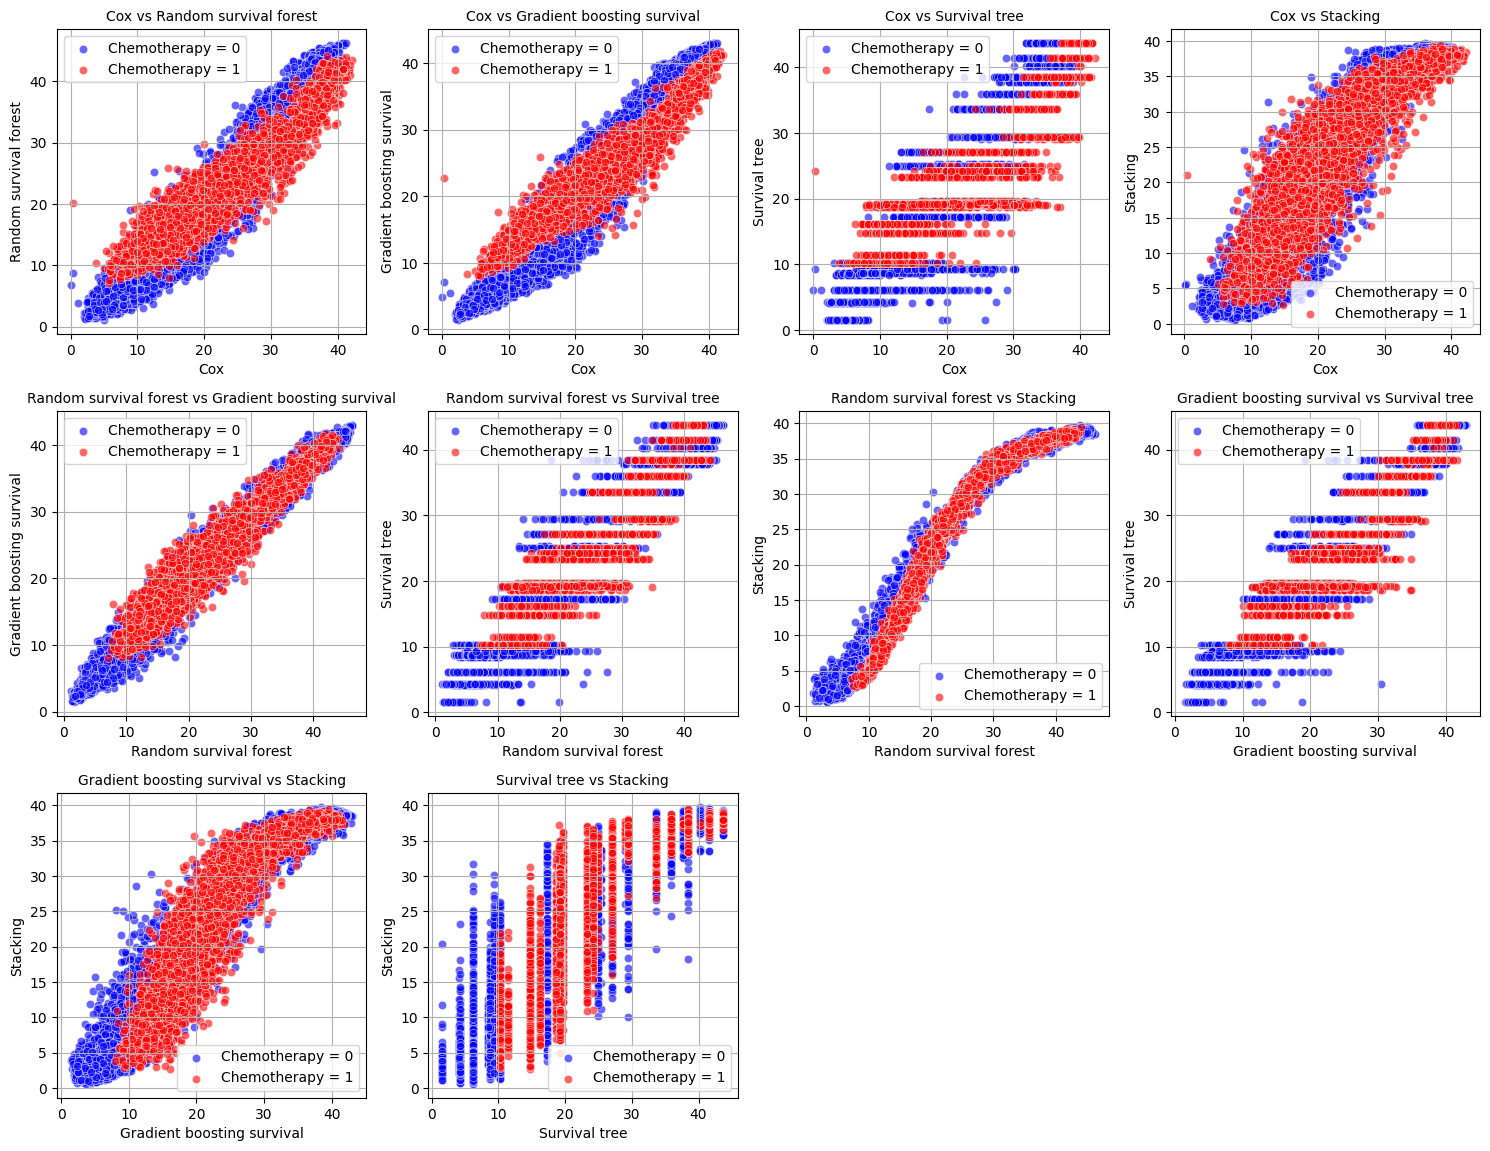

In [270]:
methods = df_combined.columns[:-1]  # remove the last column 'Surgery'
num_methods = len(methods)

plt.figure(figsize=(15, 15))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]

        # Create subplots
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        
        # Plot for chemotherapy = 0
        plt.scatter(chemotherapy_0[method1], chemotherapy_0[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='blue', label='Chemotherapy = 0')
        
        # Plot for chemotherapy = 1
        plt.scatter(chemotherapy_1[method1], chemotherapy_1[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='red', label='Chemotherapy = 1')
        
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        if plot_index:
            plt.legend()

        plot_index += 1

plt.tight_layout()
plt.show()

#### Stage group

In [272]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'], 
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'], 
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'], 
    'Stacking': results_sta_best['Predicted Survival Time (Mean)'],
    'Stage group': results['Stage Group']
})

In [273]:
df_combined

Cox  Random survival forest  Gradient boosting survival  \
0      15.569164               20.130670                   18.204676   
1      22.890884               22.359099                   21.472229   
2      30.832365               37.264445                   36.675775   
3      14.951649               16.988246                   17.979337   
4      24.585819               21.825695                   24.861167   
...          ...                     ...                         ...   
10433  21.943356               19.371331                   18.283831   
10434  30.353859               27.735714                   25.327043   
10435   7.560636                6.978365                    4.499819   
10436  18.577583               20.964374                   19.360783   
10437  10.467992                6.067790                    6.215095   

       Survival tree   Stacking  Stage group  
0          23.278372  22.074017            3  
1          24.192594  24.565485            2  
2          41.507158  36.823654            0  
3          19.214259  15.950588            3  
4          14.772510  23.539036            3  
...              ...        ...          ...  
10433      17.288499  20.669460            1  
10434      33.598274  32.649348            0  
10435       6.146255   5.133750            3  
10436      19.214259  23.894694            3  
10437       6.146255   3.490386            3  

[10438 rows x 6 columns]

In [274]:
Stage_group_0 = df_combined[df_combined['Stage group'] == 0]
Stage_group_1 = df_combined[df_combined['Stage group'] == 1]
Stage_group_2 = df_combined[df_combined['Stage group'] == 2]
Stage_group_3 = df_combined[df_combined['Stage group'] == 3]

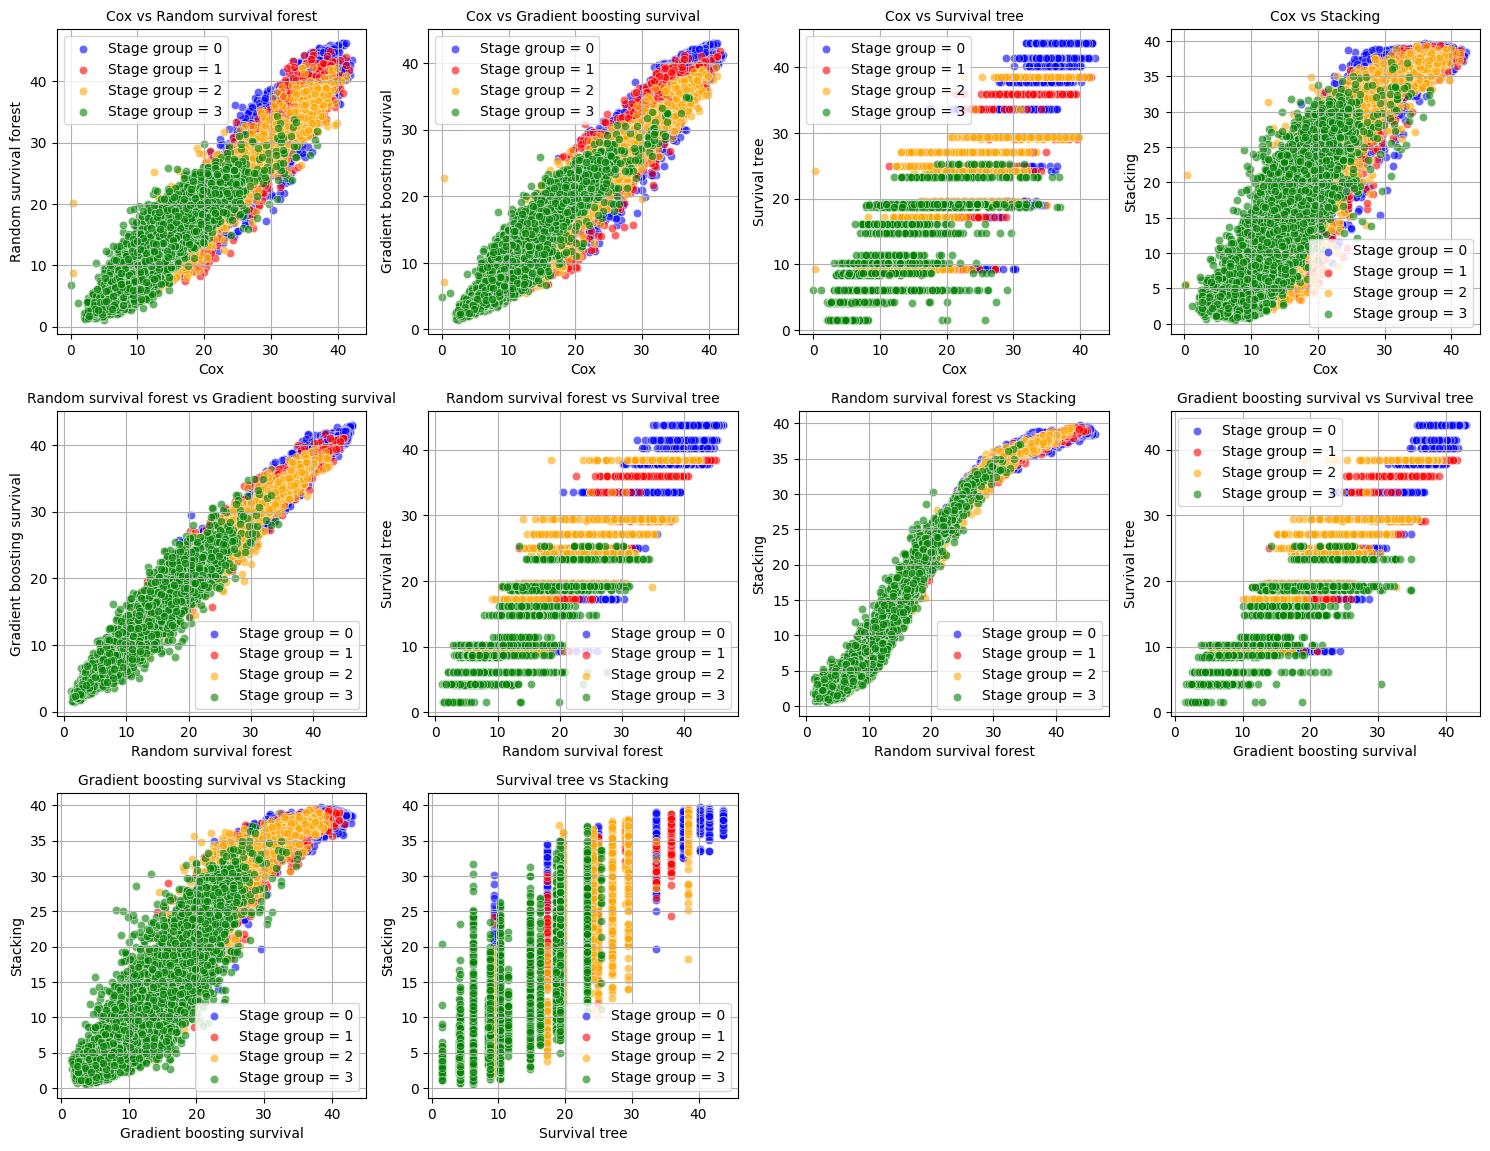

In [275]:
methods = df_combined.columns[:-1]  # remove the last column 'Surgery'
num_methods = len(methods)

plt.figure(figsize=(15, 15))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]

        # Create subplots
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        
        # Plot for stage group = 0
        plt.scatter(Stage_group_0[method1], Stage_group_0[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='blue', label='Stage group = 0')
        
        # Plot for stage group = 1
        plt.scatter(Stage_group_1[method1], Stage_group_1[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='red', label='Stage group = 1')
        
        # Plot for stage group = 2
        plt.scatter(Stage_group_2[method1], Stage_group_2[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='orange', label='Stage group = 2')
        
        # Plot for stage group = 3
        plt.scatter(Stage_group_3[method1], Stage_group_3[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='green', label='Stage group = 3')
        
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        if plot_index:
            plt.legend()

        plot_index += 1

plt.tight_layout()
plt.show()

#### Combined Summary Stage

In [276]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'], 
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'], 
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'], 
    'Stacking': results_sta_best['Predicted Survival Time (Mean)'],
    'Combined summary stage': results['Combined Summary Stage']
})

In [277]:
df_combined 

Cox  Random survival forest  Gradient boosting survival  \
0      15.569164               20.130670                   18.204676   
1      22.890884               22.359099                   21.472229   
2      30.832365               37.264445                   36.675775   
3      14.951649               16.988246                   17.979337   
4      24.585819               21.825695                   24.861167   
...          ...                     ...                         ...   
10433  21.943356               19.371331                   18.283831   
10434  30.353859               27.735714                   25.327043   
10435   7.560636                6.978365                    4.499819   
10436  18.577583               20.964374                   19.360783   
10437  10.467992                6.067790                    6.215095   

       Survival tree   Stacking  Combined summary stage  
0          23.278372  22.074017                       2  
1          24.192594  24.565485                       1  
2          41.507158  36.823654                       1  
3          19.214259  15.950588                       2  
4          14.772510  23.539036                       2  
...              ...        ...                     ...  
10433      17.288499  20.669460                       0  
10434      33.598274  32.649348                       0  
10435       6.146255   5.133750                       2  
10436      19.214259  23.894694                       2  
10437       6.146255   3.490386                       2  

[10438 rows x 6 columns]

In [278]:
Combined_summary_stage_0 = df_combined[df_combined['Combined summary stage'] == 0]
Combined_summary_stage_1 = df_combined[df_combined['Combined summary stage'] == 1]
Combined_summary_stage_2 = df_combined[df_combined['Combined summary stage'] == 2]

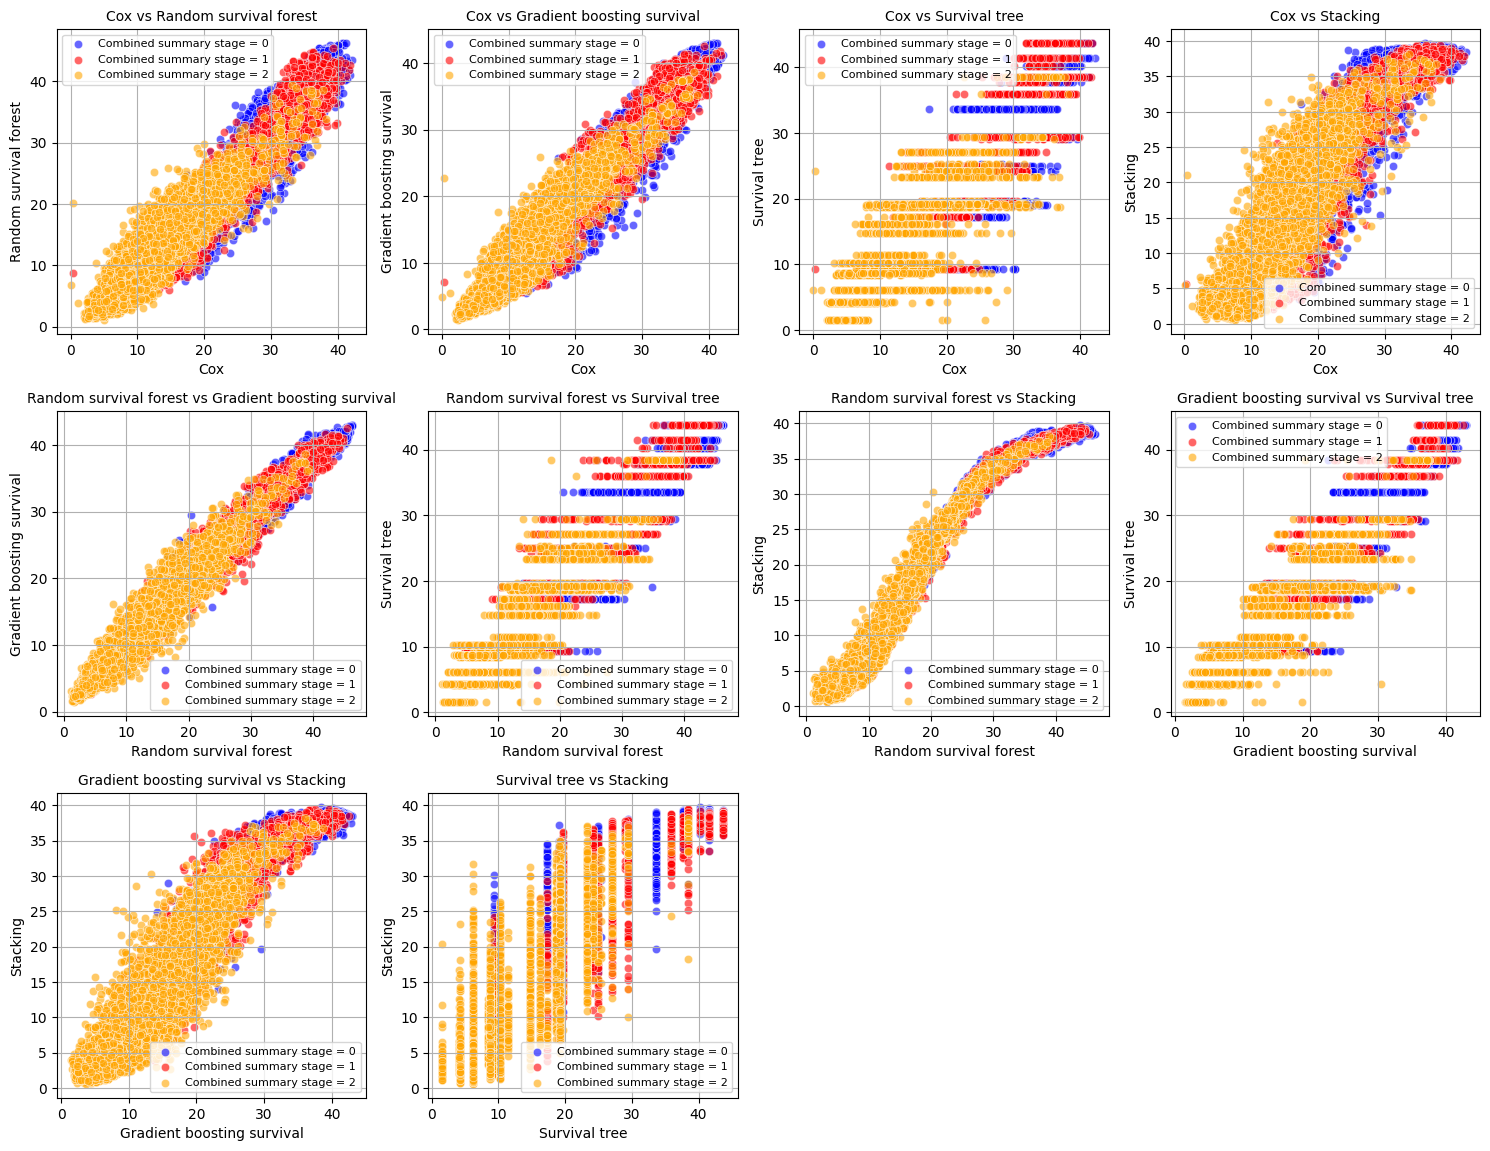

In [281]:
methods = df_combined.columns[:-1]  # remove the last column 'Surgery'
num_methods = len(methods)

plt.figure(figsize=(15, 15))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]

        # Create subplots
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        
        # Plot for Combined_summary_stage = 0
        plt.scatter(Combined_summary_stage_0[method1], Combined_summary_stage_0[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='blue', label='Combined summary stage = 0')
        
        # Plot for Combined_summary_stage = 1
        plt.scatter(Combined_summary_stage_1[method1], Combined_summary_stage_1[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='red', label='Combined summary stage = 1')
        
        # Plot for Combined_summary_stage = 2
        plt.scatter(Combined_summary_stage_2[method1], Combined_summary_stage_2[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='orange', label='Combined summary stage = 2')
        
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        if plot_index:
            plt.legend(fontsize=8)

        plot_index += 1

plt.tight_layout()
plt.show()

#### Grade

In [282]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'], 
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'], 
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'], 
    'Stacking': results_sta_best['Predicted Survival Time (Mean)'],
    'Grade': results['Grade']
})

In [287]:
df_combined

Cox  Random survival forest  Gradient boosting survival  \
0      15.569164               20.130670                   18.204676   
1      22.890884               22.359099                   21.472229   
2      30.832365               37.264445                   36.675775   
3      14.951649               16.988246                   17.979337   
4      24.585819               21.825695                   24.861167   
...          ...                     ...                         ...   
10433  21.943356               19.371331                   18.283831   
10434  30.353859               27.735714                   25.327043   
10435   7.560636                6.978365                    4.499819   
10436  18.577583               20.964374                   19.360783   
10437  10.467992                6.067790                    6.215095   

       Survival tree   Stacking  Grade  
0          23.278372  22.074017      1  
1          24.192594  24.565485      0  
2          41.507158  36.823654      2  
3          19.214259  15.950588      1  
4          14.772510  23.539036      1  
...              ...        ...    ...  
10433      17.288499  20.669460      1  
10434      33.598274  32.649348      1  
10435       6.146255   5.133750      2  
10436      19.214259  23.894694      1  
10437       6.146255   3.490386      1  

[10438 rows x 6 columns]

In [288]:
grade_0 = df_combined[df_combined['Grade'] == 0]
grade_1 = df_combined[df_combined['Grade'] == 1]
grade_2 = df_combined[df_combined['Grade'] == 2]
grade_3 = df_combined[df_combined['Grade'] == 3]

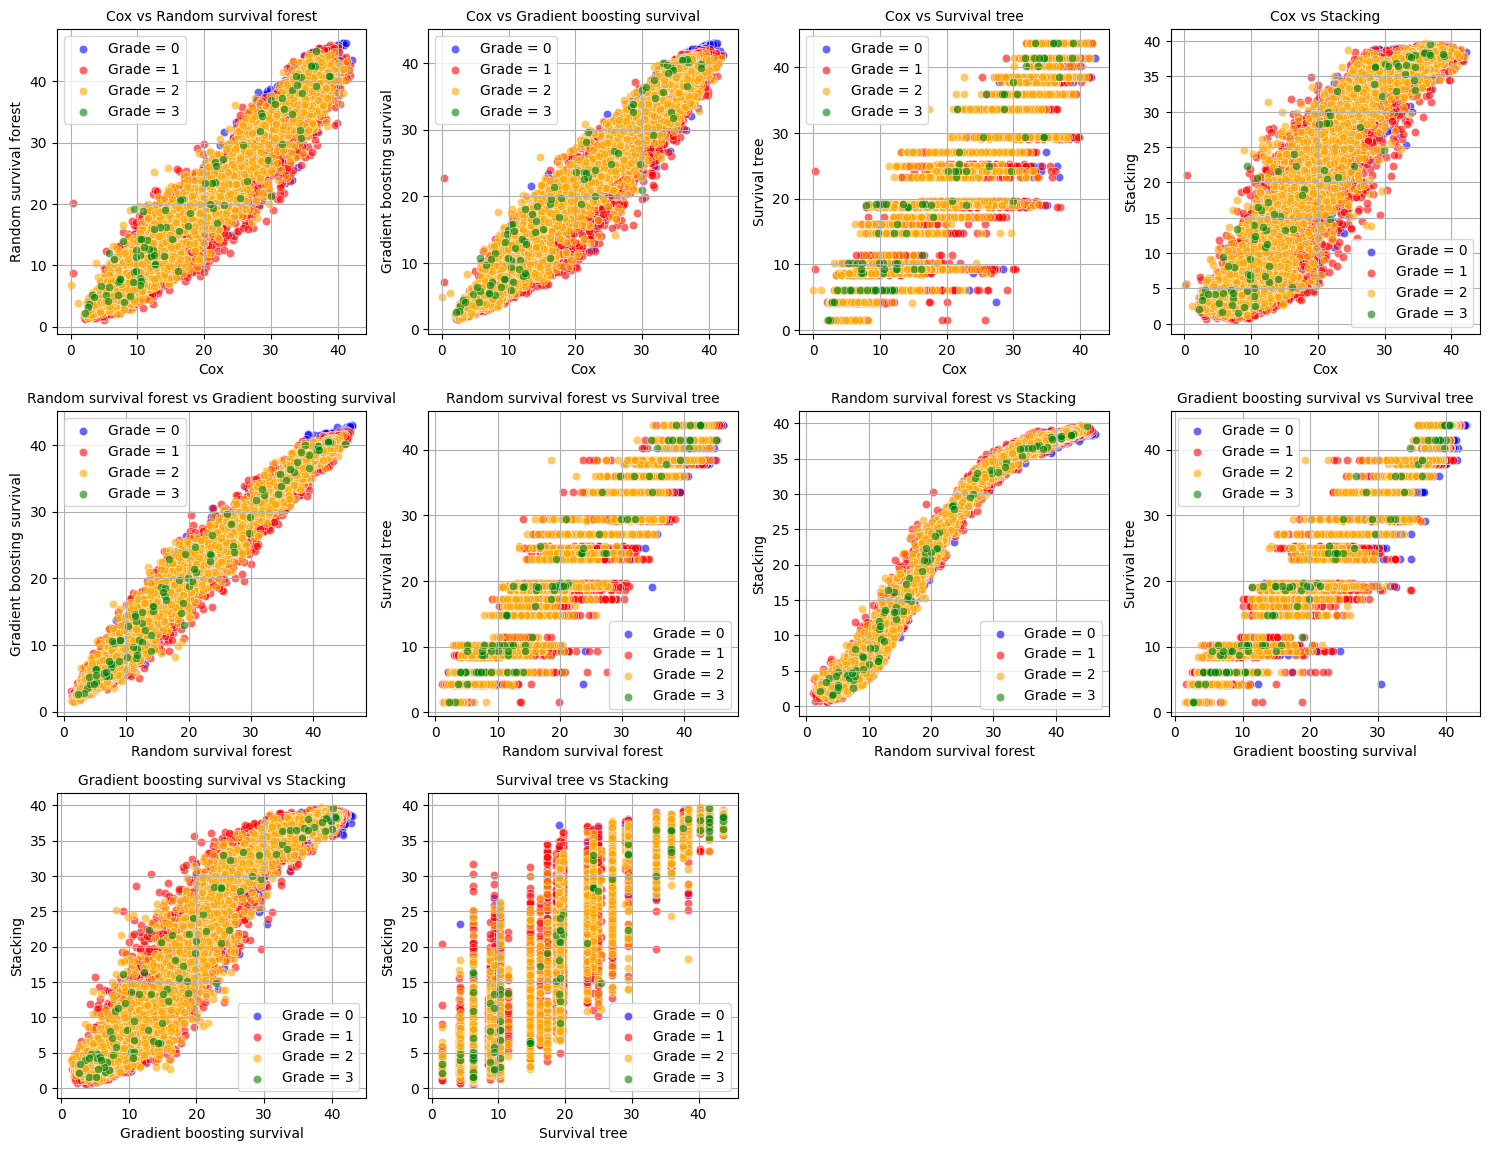

In [289]:
methods = df_combined.columns[:-1]  # remove the last column 'Surgery'
num_methods = len(methods)

plt.figure(figsize=(15, 15))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]

        # Create subplots
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        
        # Plot for grade = 0
        plt.scatter(grade_0[method1], grade_0[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='blue', label='Grade = 0')
        
        # Plot for grade = 1
        plt.scatter(grade_1[method1], grade_1[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='red', label='Grade = 1')
        
        # Plot for grade = 2
        plt.scatter(grade_2[method1], grade_2[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='orange', label='Grade = 2')
        
        # Plot for grade = 3
        plt.scatter(grade_3[method1], grade_3[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='green', label='Grade = 3')
        
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        if plot_index:
            plt.legend()

        plot_index += 1

plt.tight_layout()
plt.show()

#### A group of individuals of the test sample

Stage group==3

In [291]:
# Create a combined DataFrame with all predictions
df_combined = pd.DataFrame({
    'Cox': results['Predicted Survival Time (Mean)'],
    'Random survival forest': results_rsf_best['Predicted Survival Time (Mean)'], 
    'Gradient boosting survival': results_gbm['Predicted Survival Time (Mean)'], 
    'Survival tree': results_st_best['Predicted Survival Time (Mean)'], 
    'Stacking': results_sta_best['Predicted Survival Time (Mean)'],
    'Stage group': results['Stage Group']
})

In [292]:
Stage_group_3 = df_combined[df_combined['Stage group'] == 3]

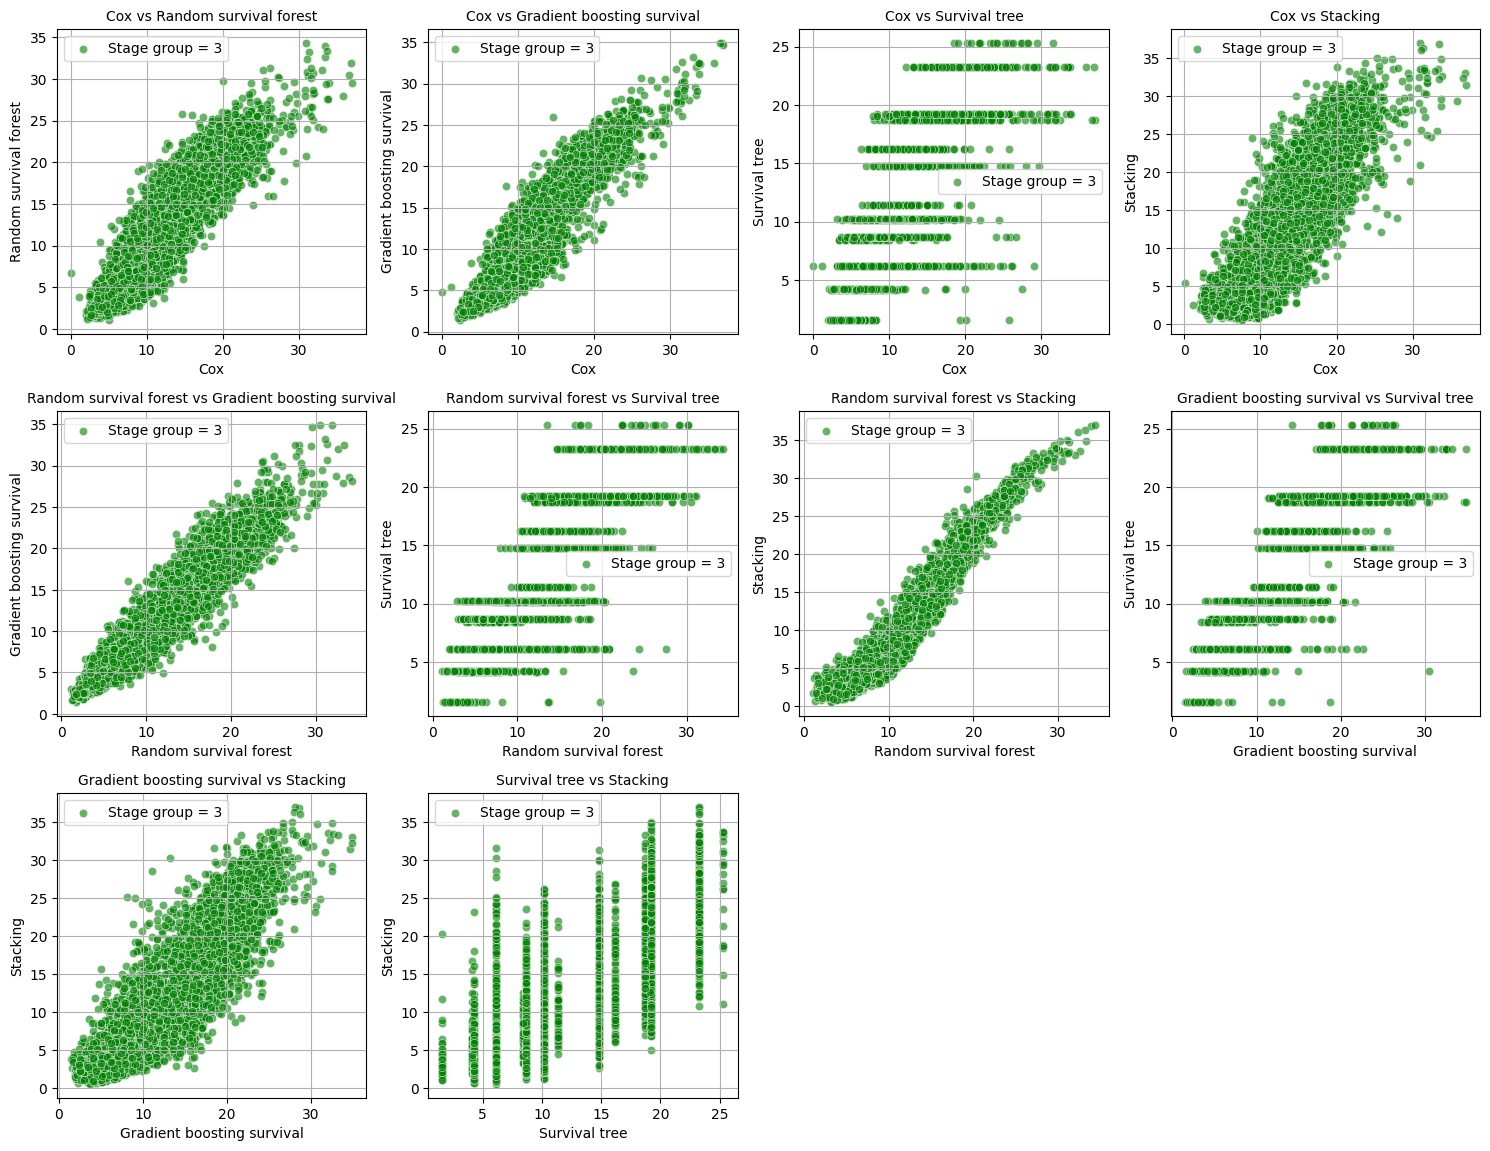

In [293]:
methods = df_combined.columns[:-1]  # remove the last column 'Surgery'
num_methods = len(methods)

plt.figure(figsize=(15, 15))

plot_index = 1
for i in range(num_methods):
    for j in range(i + 1, num_methods):
        method1 = methods[i]
        method2 = methods[j]

        # Create subplots
        plt.subplot(num_methods - 1, num_methods - 1, plot_index)
        
        # Plot for stage group = 3
        plt.scatter(Stage_group_3[method1], Stage_group_3[method2], alpha=0.6, edgecolors='w', linewidth=0.5, c='green', label='Stage group = 3')
        
        plt.xlabel(method1)
        plt.ylabel(method2)
        plt.title(f'{method1} vs {method2}', fontsize=10)
        plt.grid(True)
        
        if plot_index:
            plt.legend()

        plot_index += 1

plt.tight_layout()
plt.show()